In [64]:
import pandas as pd
import glob
import numpy as np
import pickle as pkl
from tqdm import tqdm
import matplotlib.pyplot as plt

# gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.models import LdaModel
from gensim.models.ldamulticore import LdaMulticore



ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/home/mashrekur/anaconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

In [63]:
# load raw corpus dataframe
with open('data/raw_corpus.pkl', 'rb') as f:
    corpus_df = pkl.load(f)
    
# load cleaned corpus
with open('data/cleaned_corpus.pkl', 'rb') as f:
    corpus = pkl.load(f)

In [20]:
nTopics = 17

In [21]:
# load model
fname = f'trained_models/trained_lda_model_{nTopics}'
lda_model = LdaModel.load(fname)

#load topic probabilities for each paper
topic_distributions = np.load(f'data/topic_distributions_{lda_model.num_topics}.npy')

In [22]:
corpus_df 

,DOI,Year,Journal,Title,Abstract,Affiliation
0,10.1029/91WR01996,1991,Water Resour. Res.,WEIGHTED SUM TRANSFERABLE DISCHARGE PERMIT PRO...,Transferable discharge permit (TDP) programs f...,CANADA
1,10.1029/91WR00590,1991,Water Resour. Res.,RELIABILITY IMPROVEMENTS IN DESIGN OF WATER DI...,Water distribution networks can fail either by...,CANADA
2,10.1029/91WR02077,1991,Water Resour. Res.,A NOTE ON FRACTAL CHANNEL NETWORKS,This paper studies the relation between the st...,ITALY
3,10.1029/91WR01990,1991,Water Resour. Res.,EFFECTS OF SOIL HETEROGENEITY ON PESTICIDE LEA...,Pesticide leaching was simulated numerically a...,NETHERLANDS
4,10.1029/91WR02025,1991,Water Resour. Res.,EFFECT OF CATCHMENT-SCALE SUBSURFACE MIXING ON...,A 3.8-ha watershed on the west coast of New Ze...,USA
5,10.1029/91WR02028,1991,Water Resour. Res.,A MODEL FOR SIMULATING TRANSPORT OF REACTIVE M...,This paper presents the development and demons...,USA
6,10.1029/91WR02270,1991,Water Resour. Res.,TRACER TRANSPORT IN FRACTURES - ANALYSIS OF FI...,A variable-aperture channel model is used as t...,USA
7,10.1029/91WR01405,1991,Water Resour. Res.,A LARGE-SCALE FLOW AND TRACER EXPERIMENT IN GR...,This paper describes the Stripa three-dimensio...,SWEDEN
8,10.1029/91WR01404,1991,Water Resour. Res.,A LARGE-SCALE FLOW AND TRACER EXPERIMENT IN GR...,Water and tracer flow has been monitored in a ...,SWEDEN
9,10.1029/91WR02026,1991,Water Resour. Res.,HYDROLOGIC APPLICATIONS OF THE CONNECTION MACH...,Massively parallel computers will play an incr...,USA


In [23]:
# get a list of all journals
journals = corpus_df.Journal.unique()
journals

array(['Water Resour. Res.', 'Hydrol. Process.',
       'Hydrol. Sci. J.-J. Sci. Hydrol.', 'J. Hydrometeorol.',
       'J. Hydrol.', 'Adv. Water Resour.', 'Hydrol. Earth Syst. Sci.'],
      dtype=object)

In [24]:
# count papers in years
nyear = {}
for y, year in enumerate(corpus_df.Year.unique()):
    nyear[year] = corpus_df.loc[corpus_df.Year == year].shape[0]
sorted(nyear.items())

[('1991', 633),
 ('1992', 667),
 ('1993', 737),
 ('1994', 683),
 ('1995', 987),
 ('1996', 840),
 ('1997', 910),
 ('1998', 872),
 ('1999', 953),
 ('2000', 1010),
 ('2001', 992),
 ('2002', 1135),
 ('2003', 1223),
 ('2004', 1333),
 ('2005', 1226),
 ('2006', 1617),
 ('2007', 1782),
 ('2008', 1837),
 ('2009', 1815),
 ('2010', 1843),
 ('2011', 1953),
 ('2012', 2270),
 ('2013', 2428),
 ('2014', 2718),
 ('2015', 2593),
 ('2016', 2617),
 ('2017', 2663),
 ('2018', 2626),
 ('2019', 2723)]

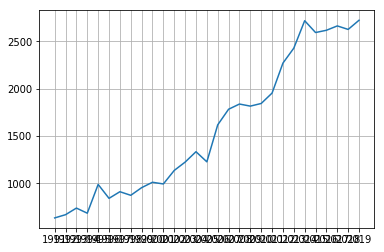

In [25]:
x,y = zip(*sorted(nyear.items()))
plt.plot(x,y)
plt.grid()
plt.show()

In [26]:
# run the model
doc_lda = lda_model[corpus]

In [28]:
# create time series

# all years where we have data
years = np.unique(corpus_df['Year'])

# init storage (as a dictionary)
popularity_all_journals = {}
popularity_by_journal = np.zeros([len(corpus_df.Journal.unique()), len(years), lda_model.num_topics])

# loop through years
for y, year in enumerate(years):
    
    # extract all papers in this year
    topic_distributions_year = topic_distributions[corpus_df['Year'] == year,:]

    # calculate topic popularity for this year
    popularity_all_journals[year] = np.sum(topic_distributions_year, axis=0) / np.sum(topic_distributions_year)
    
    # topic popularity by journal
    for j, journal in enumerate(corpus_df.Journal.unique()):
        jyidx = np.where(np.logical_and((corpus_df.Journal == journal), (corpus_df.Year == year)))[0]
        popularity_by_journal[j,y,:] = np.sum(topic_distributions[jyidx,:], axis=0) / np.sum(topic_distributions[jyidx,:])

/home/mashrekur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


In [43]:
def calc_entropy(pmf):
    return -np.nansum(pmf * np.log(pmf))

In [ ]:
# calculate entropy 
entropy_by_journal = np.full([len(corpus_df.Journal.unique()), len(years)], np.nan)
for y, year in enumerate(years):
    for j, journal in enumerate(journals):
        entropy_by_journal[j,y] = calc_entropy(popularity_by_journal[j,y,:])

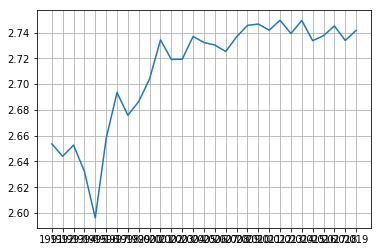

In [58]:
x,y = zip(*sorted(entropy_all_journals.items()))
plt.plot(x,y)
plt.grid()
plt.show()

In [59]:
plt.plot(np.transpose(entropy_by_journal))
plt.grid()
plt.ylim([1.6,2.3])
plt.show()

NameError: name 'entropy_by_journal' is not defined

In [60]:
entropy_year_journal = entropy(hm)
entropy_year_journal

NameError: name 'entropy' is not defined

In [ ]:
#Popularity of topics by journal plot

In [29]:
def calc_KL_divergence(pmf1,pmf2):
    return -np.nansum(pmf1 * np.log(pmf2/pmf1))

In [42]:
def jensen_shannon_distance(pmf1,pmf2):
    M=0.5*(pmf1+pmf2)
    D1=calc_KL_divergence(pmf1,M)
    D2=calc_KL_divergence(pmf2,M)
    JSDiv = 0.5*D1+0.5*D2
    JSD = np.sqrt(JSDiv)
    return JSD

In [44]:
journals = corpus_df['Journal'].unique()
years = corpus_df['Year'].unique()
njournals = len(journals)
nyears = len(years)

In [46]:
# calculate JSD 
JSD_across_journals = np.full([njournals,njournals,nyears], np.nan)
for y, year in enumerate(years):
    for j1, journal1 in enumerate(journals):
        for j2, journal2 in enumerate(journals):
            JSD_across_journals[j1,j2,y] = jensen_shannon_distance(popularity_by_journal[j1,y,:],popularity_by_journal[j2,y,:])

0 0
Water Resour. Res. Water Resour. Res.


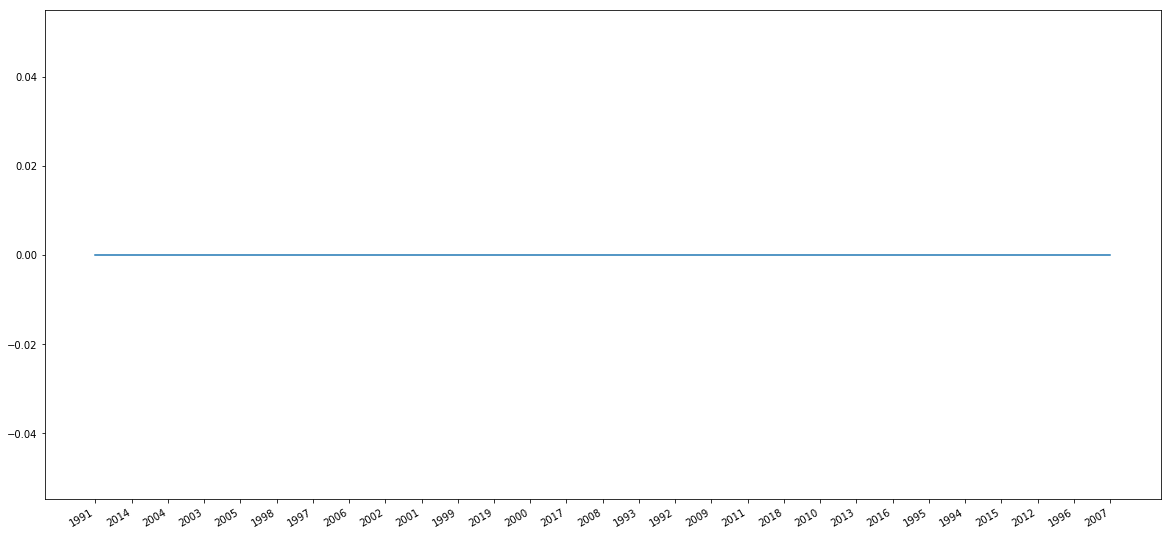

0 1
Water Resour. Res. Hydrol. Process.


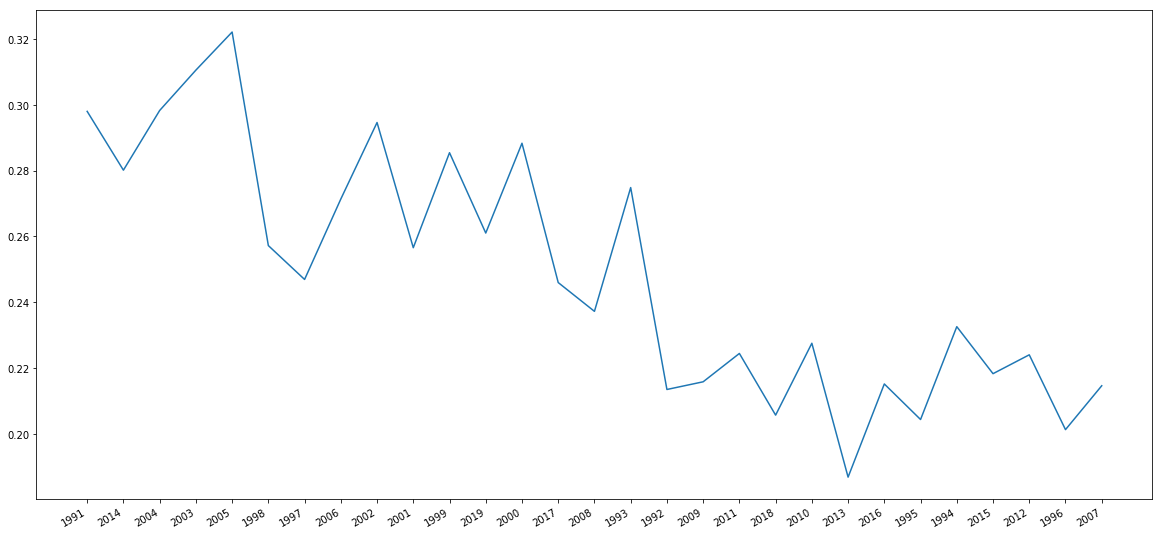

0 2
Water Resour. Res. Hydrol. Sci. J.-J. Sci. Hydrol.


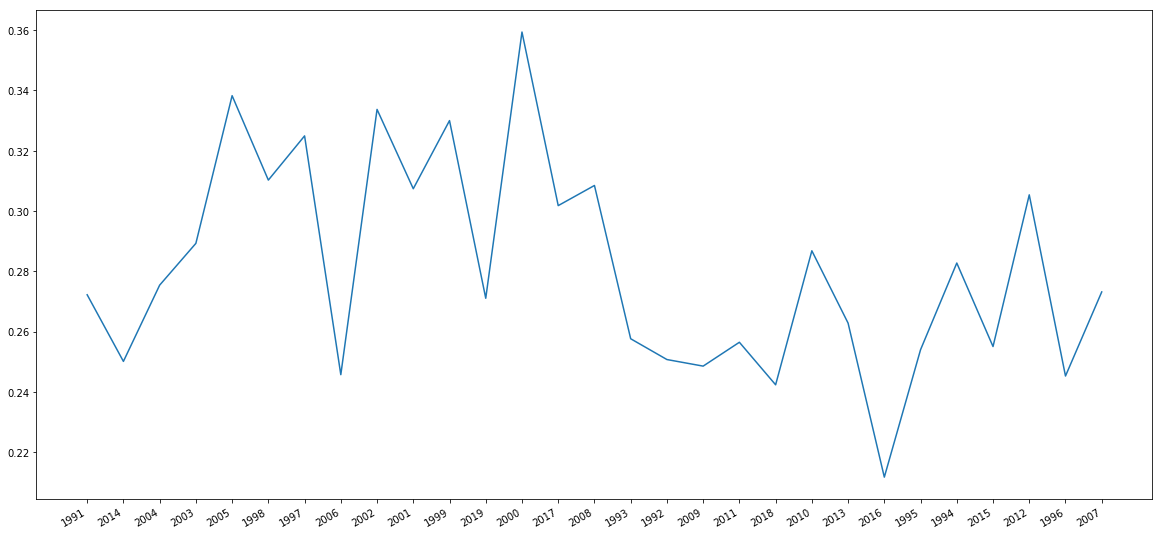

0 3
Water Resour. Res. J. Hydrometeorol.


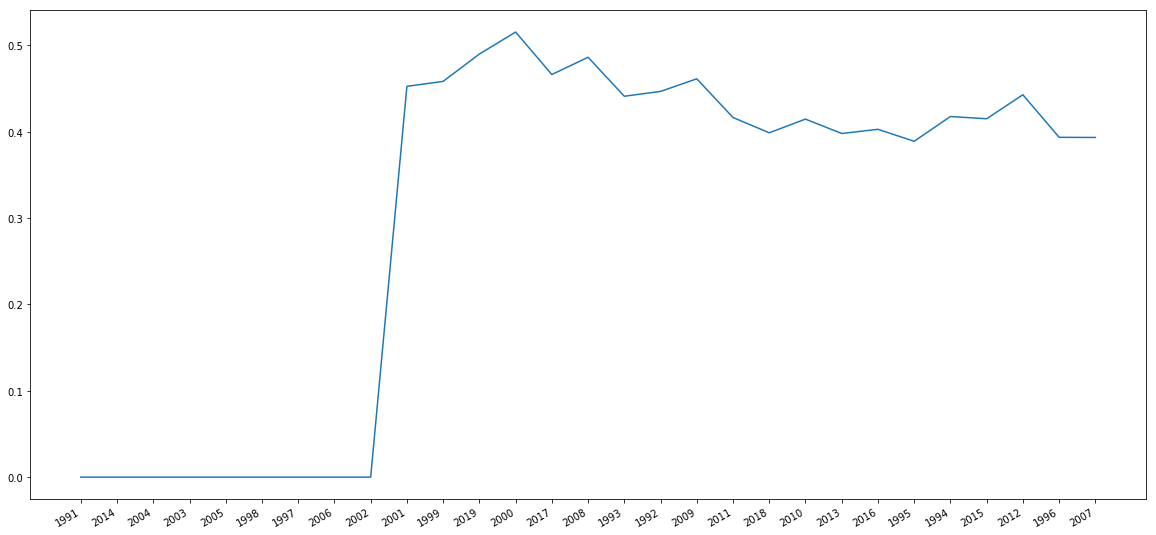

0 4
Water Resour. Res. J. Hydrol.


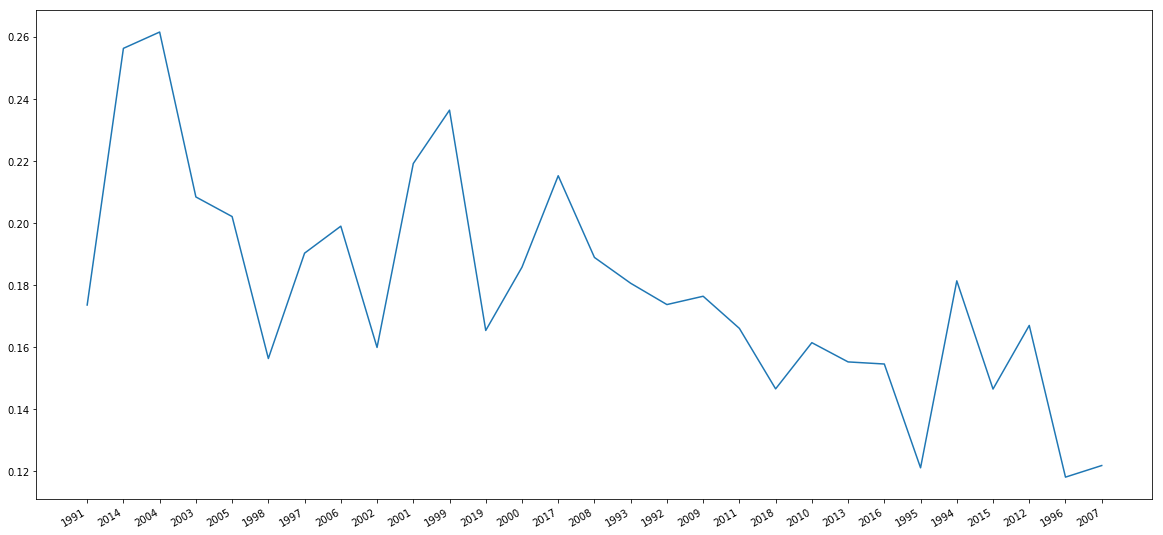

0 5
Water Resour. Res. Adv. Water Resour.


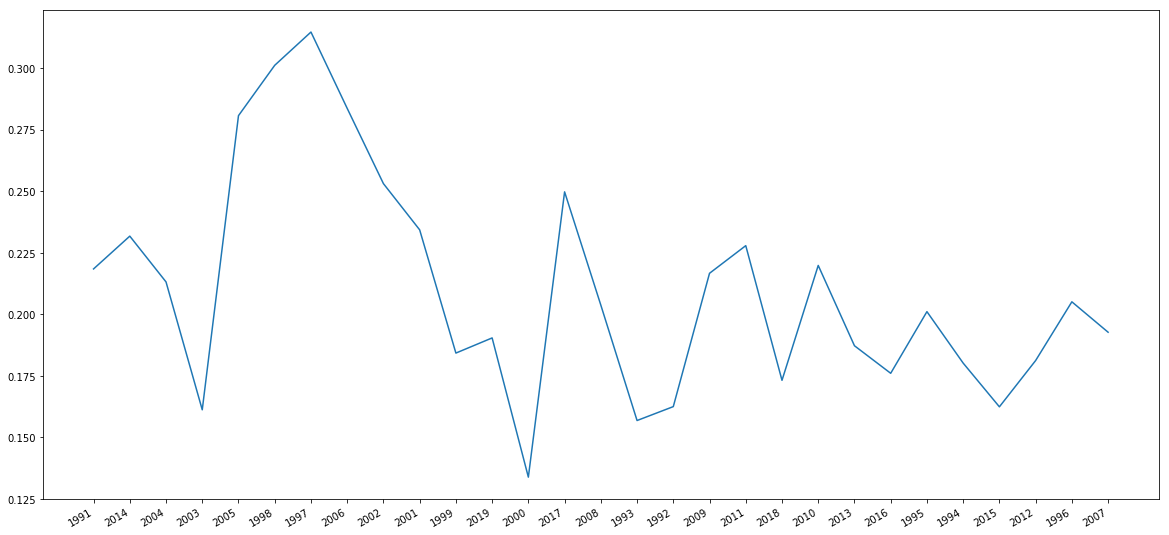

0 6
Water Resour. Res. Hydrol. Earth Syst. Sci.


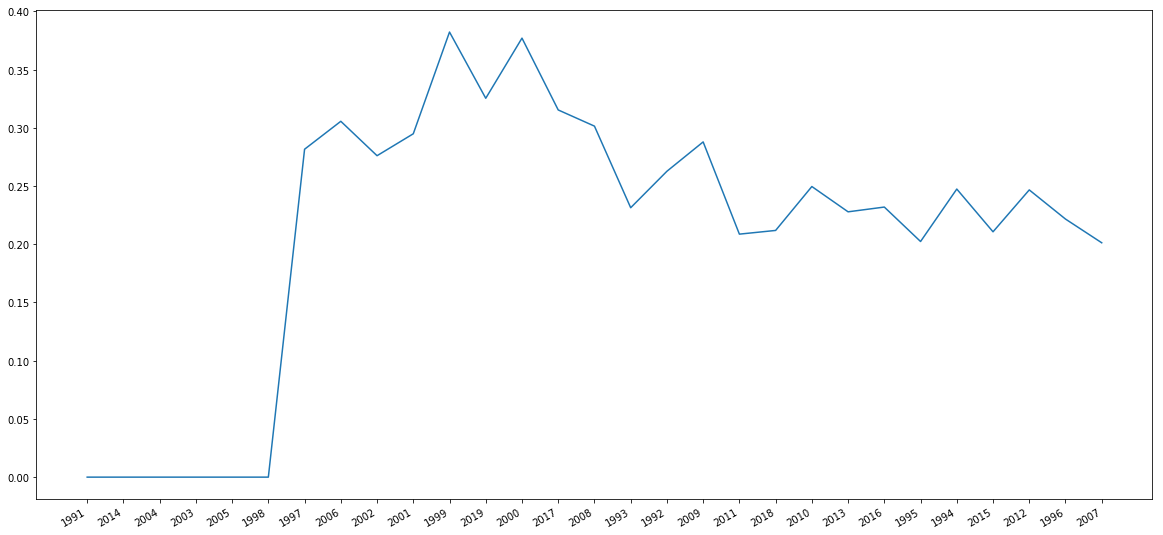

1 0
Hydrol. Process. Water Resour. Res.


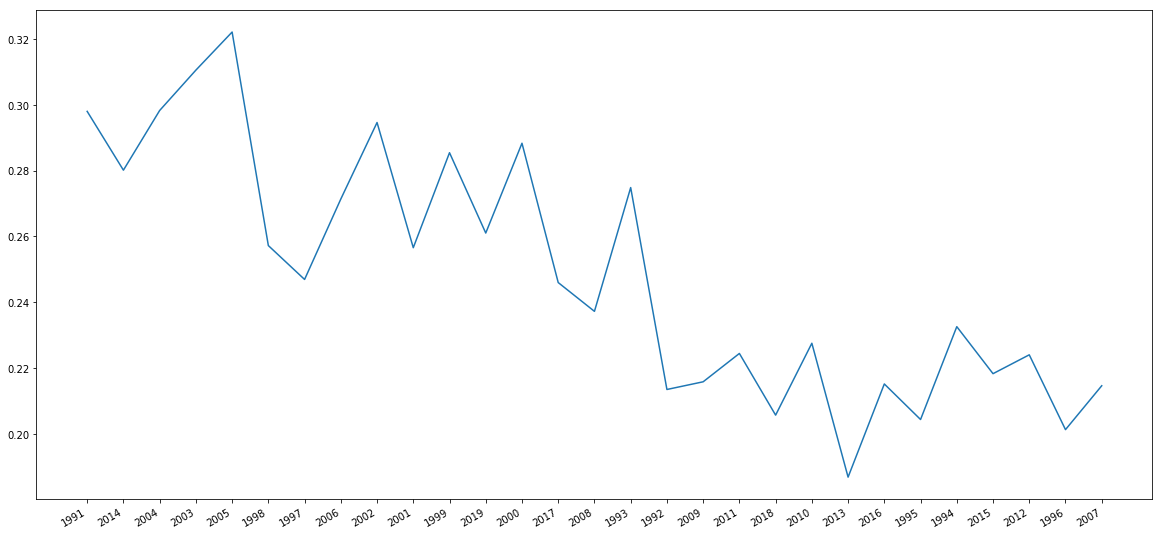

1 1
Hydrol. Process. Hydrol. Process.


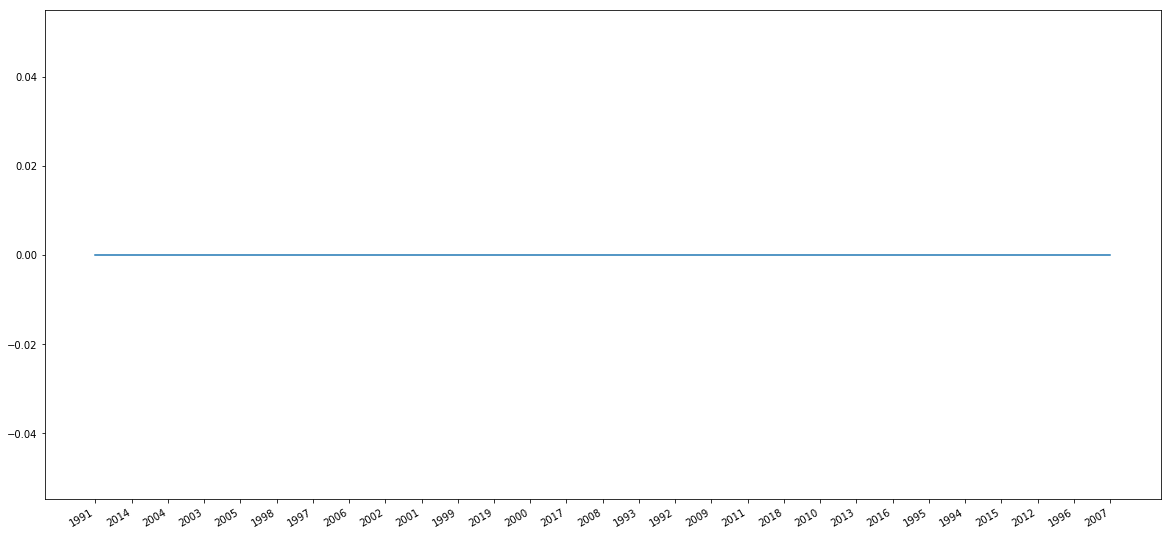

1 2
Hydrol. Process. Hydrol. Sci. J.-J. Sci. Hydrol.


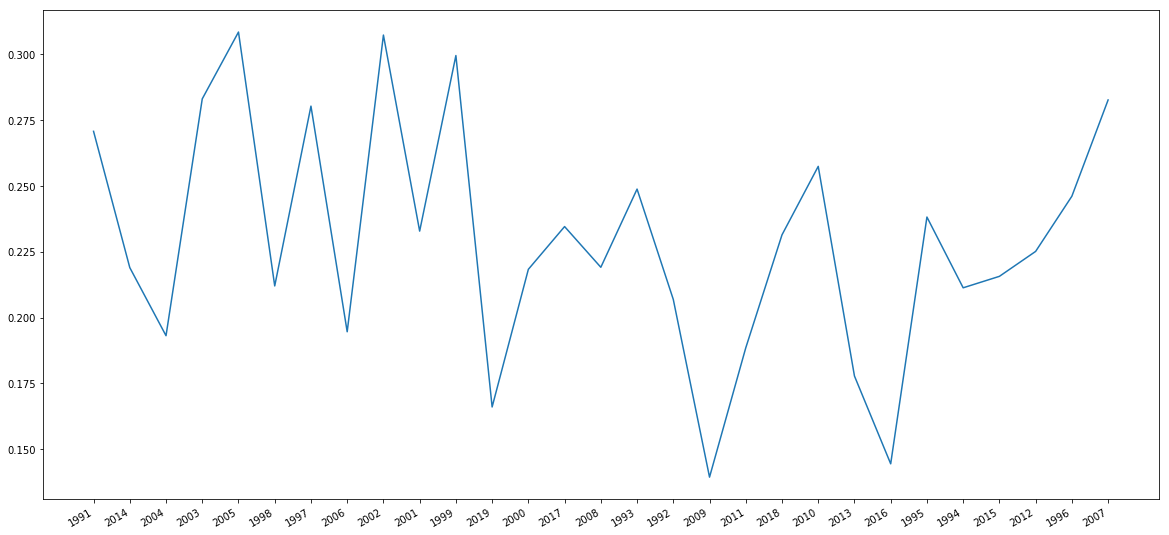

1 3
Hydrol. Process. J. Hydrometeorol.


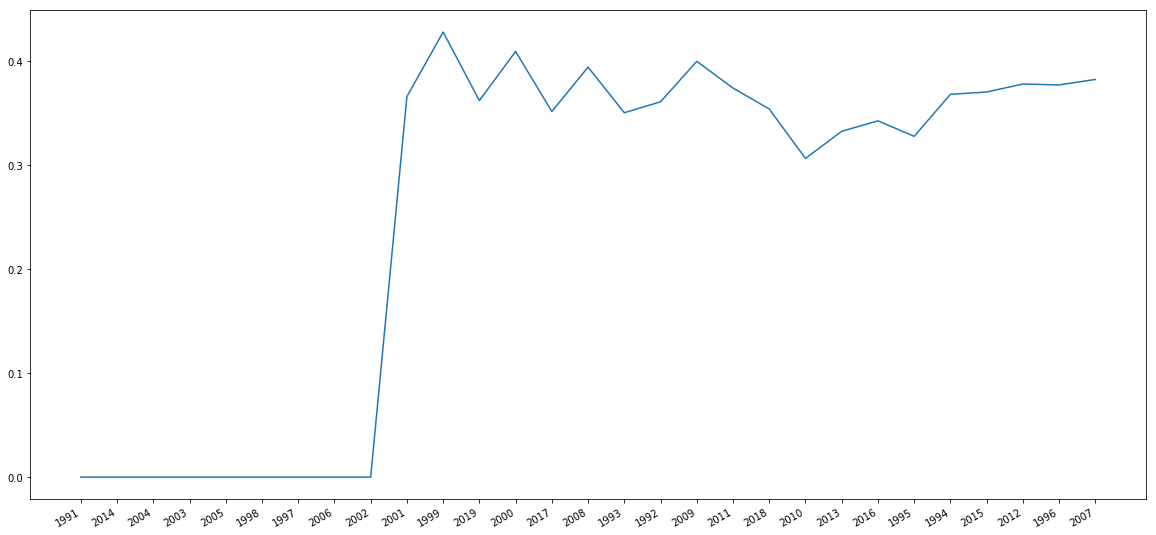

1 4
Hydrol. Process. J. Hydrol.


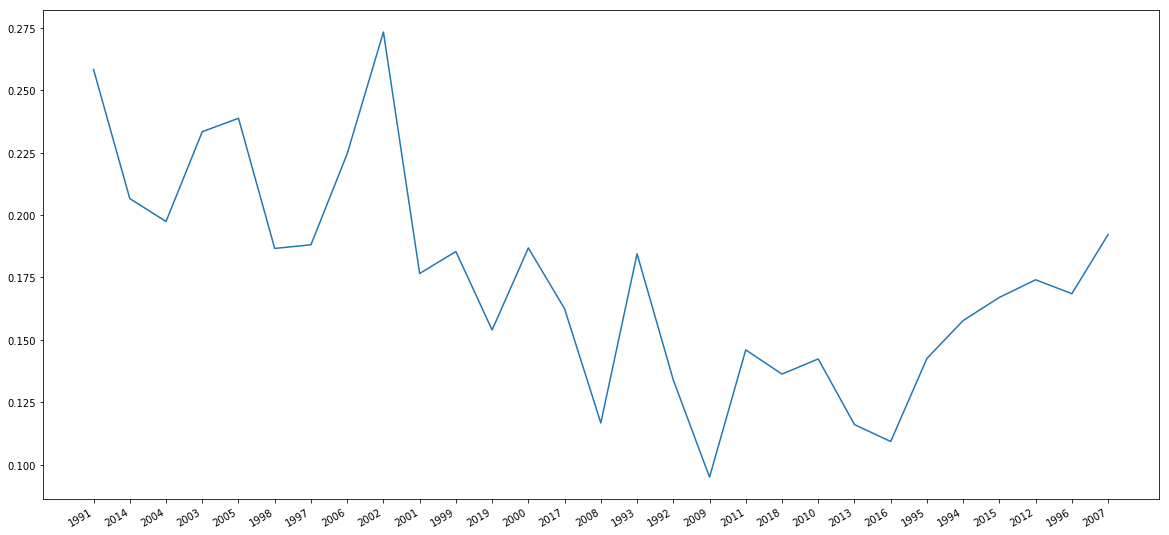

1 5
Hydrol. Process. Adv. Water Resour.


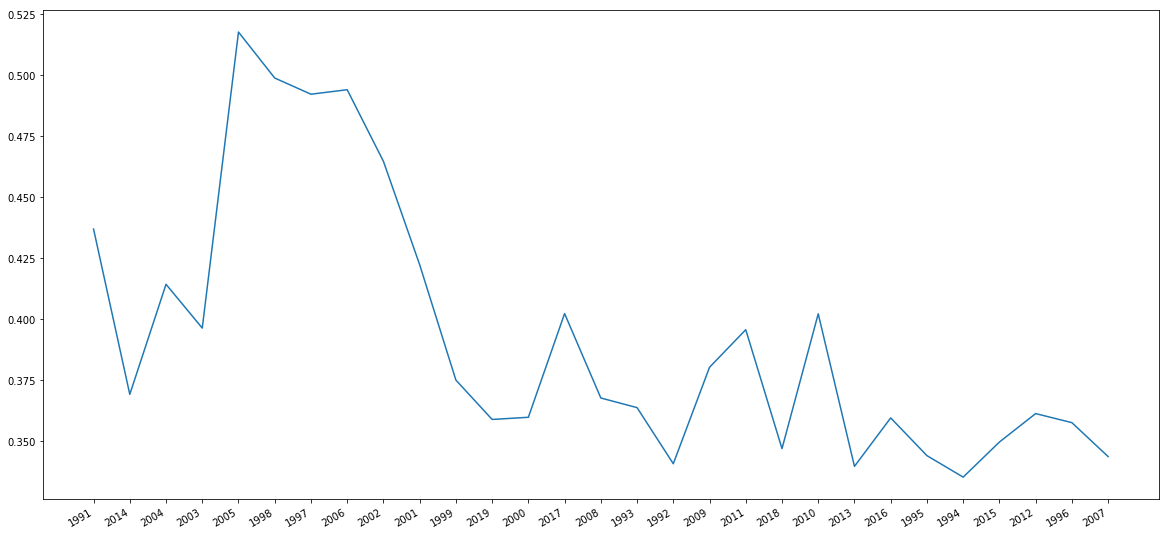

1 6
Hydrol. Process. Hydrol. Earth Syst. Sci.


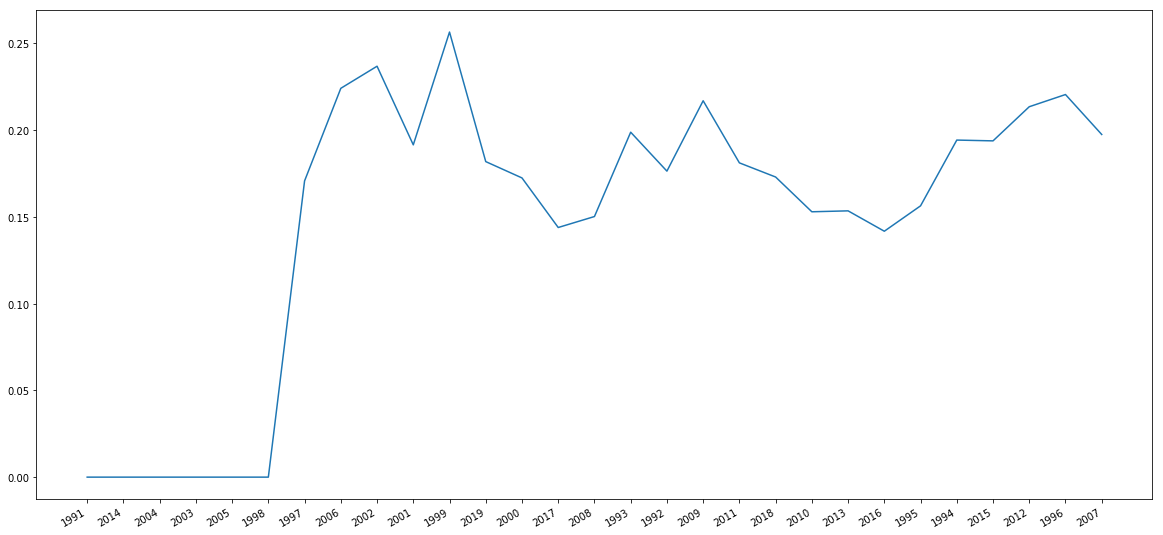

2 0
Hydrol. Sci. J.-J. Sci. Hydrol. Water Resour. Res.


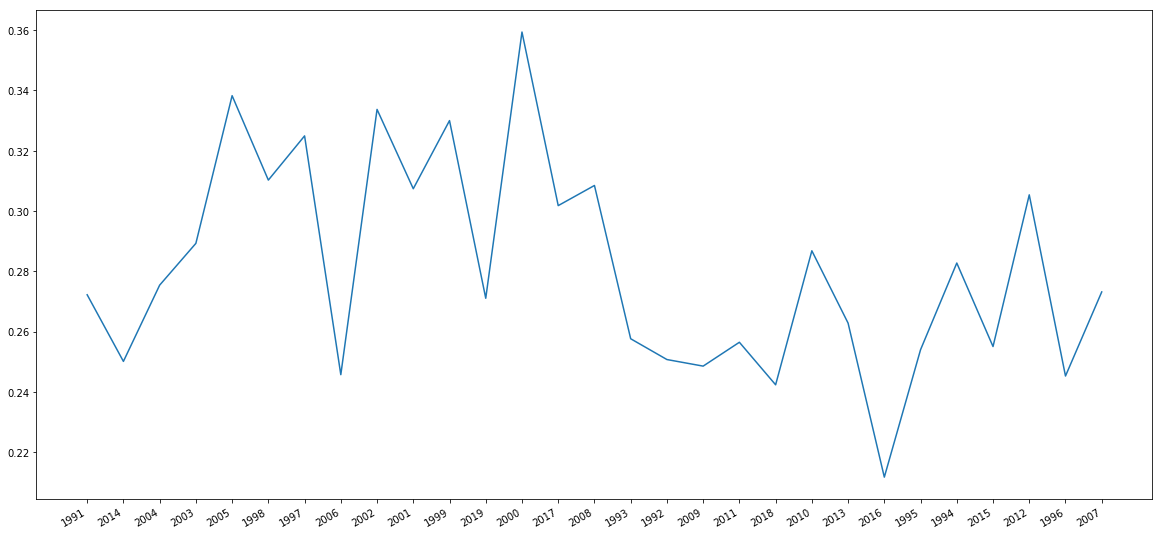

2 1
Hydrol. Sci. J.-J. Sci. Hydrol. Hydrol. Process.


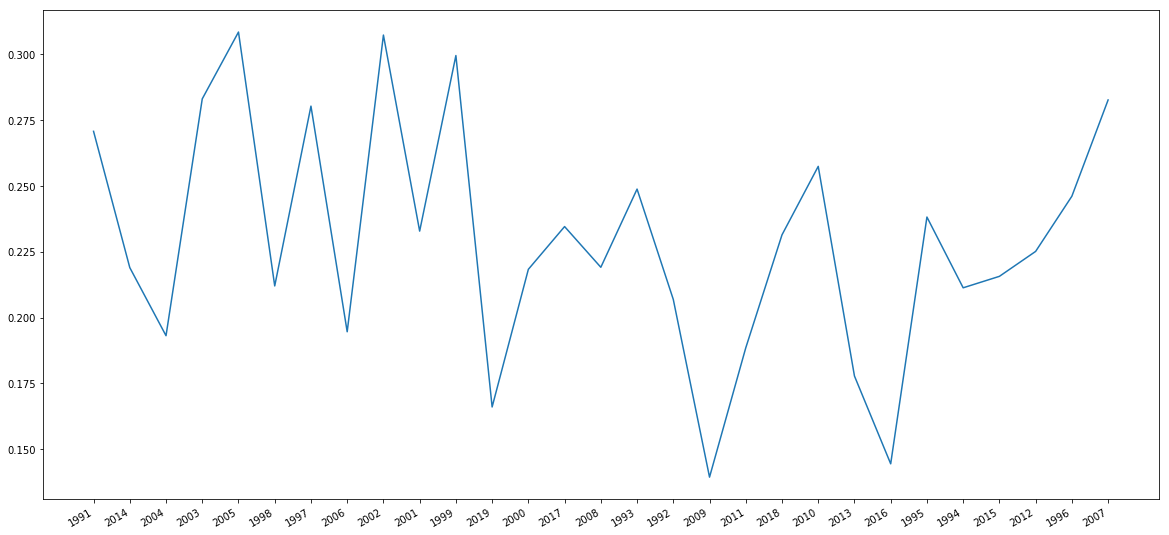

2 2
Hydrol. Sci. J.-J. Sci. Hydrol. Hydrol. Sci. J.-J. Sci. Hydrol.


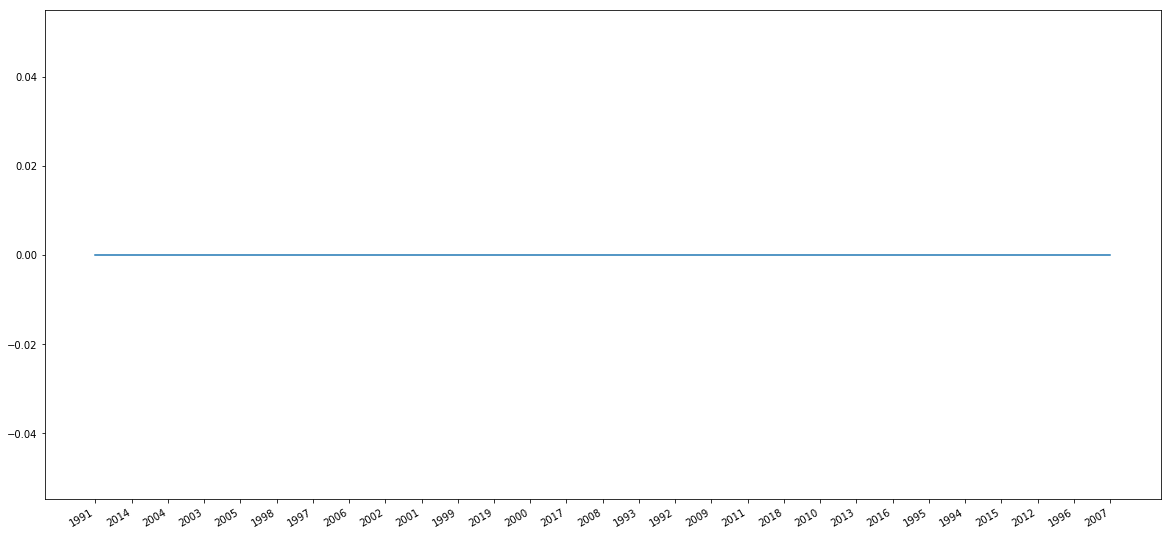

2 3
Hydrol. Sci. J.-J. Sci. Hydrol. J. Hydrometeorol.


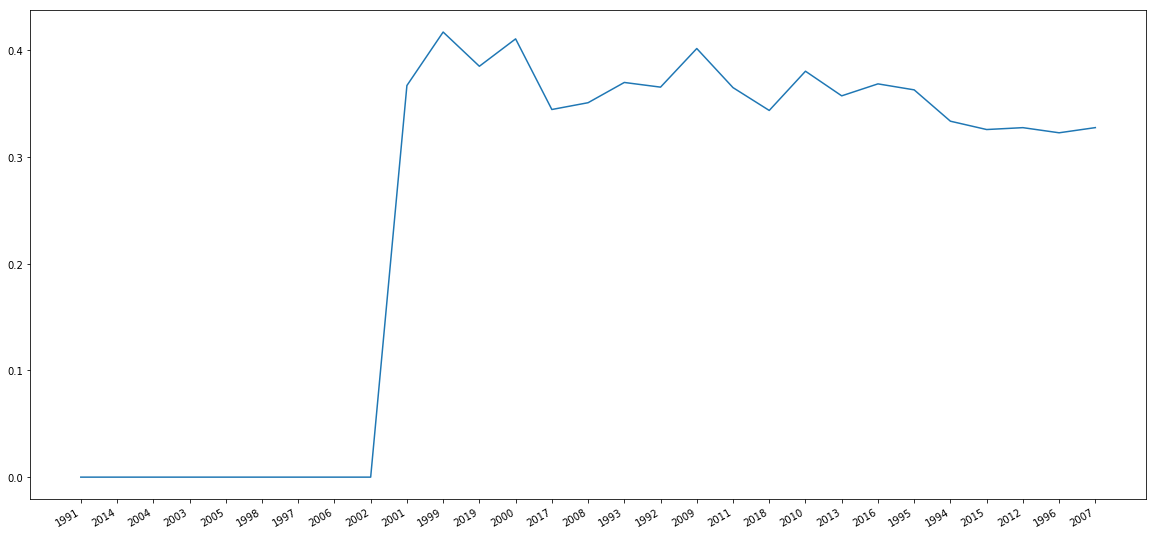

2 4
Hydrol. Sci. J.-J. Sci. Hydrol. J. Hydrol.


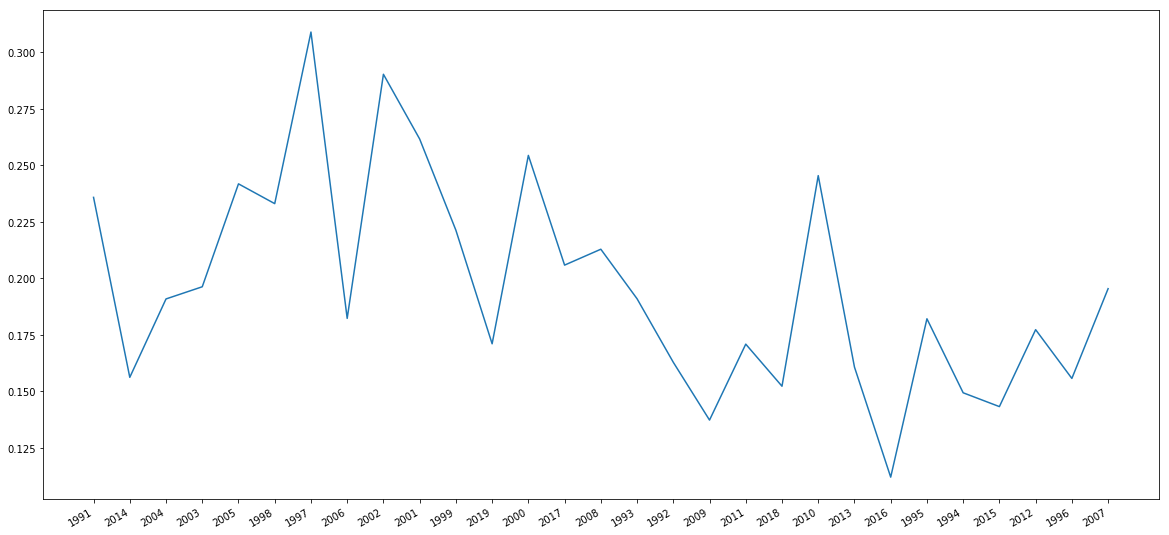

2 5
Hydrol. Sci. J.-J. Sci. Hydrol. Adv. Water Resour.


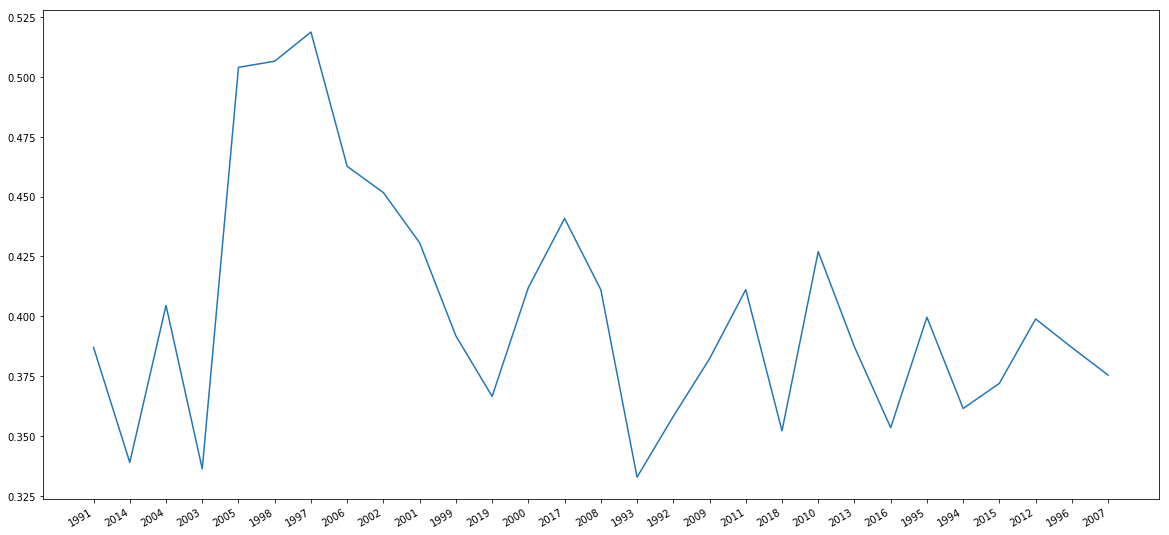

2 6
Hydrol. Sci. J.-J. Sci. Hydrol. Hydrol. Earth Syst. Sci.


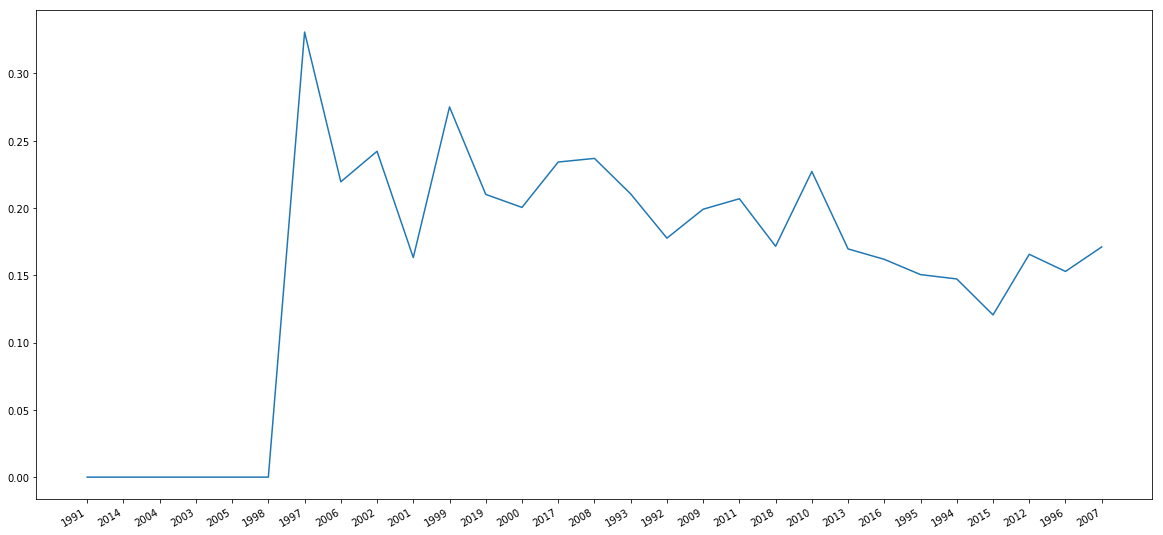

3 0
J. Hydrometeorol. Water Resour. Res.


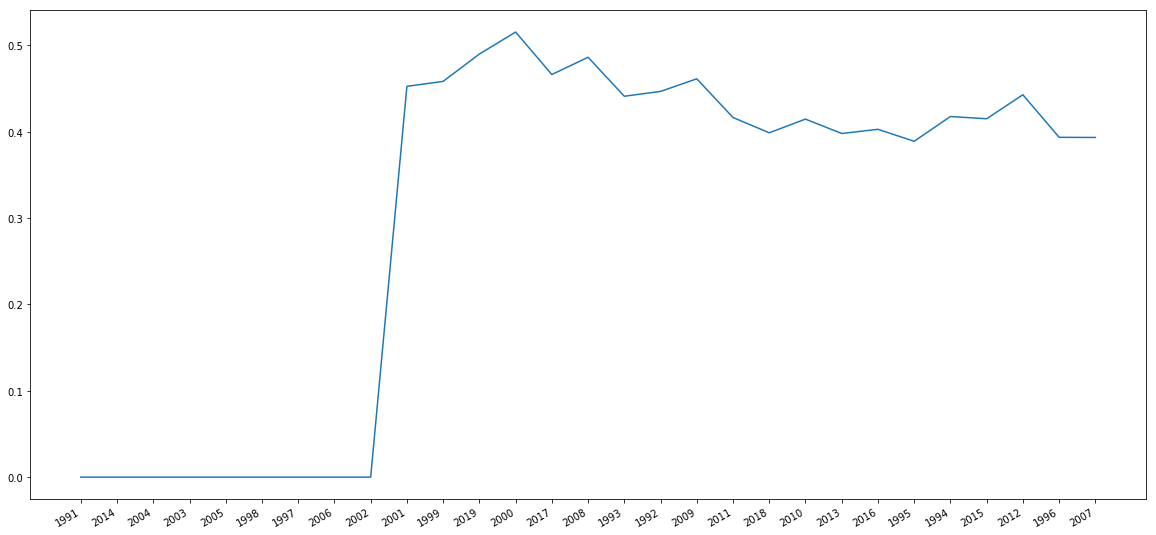

3 1
J. Hydrometeorol. Hydrol. Process.


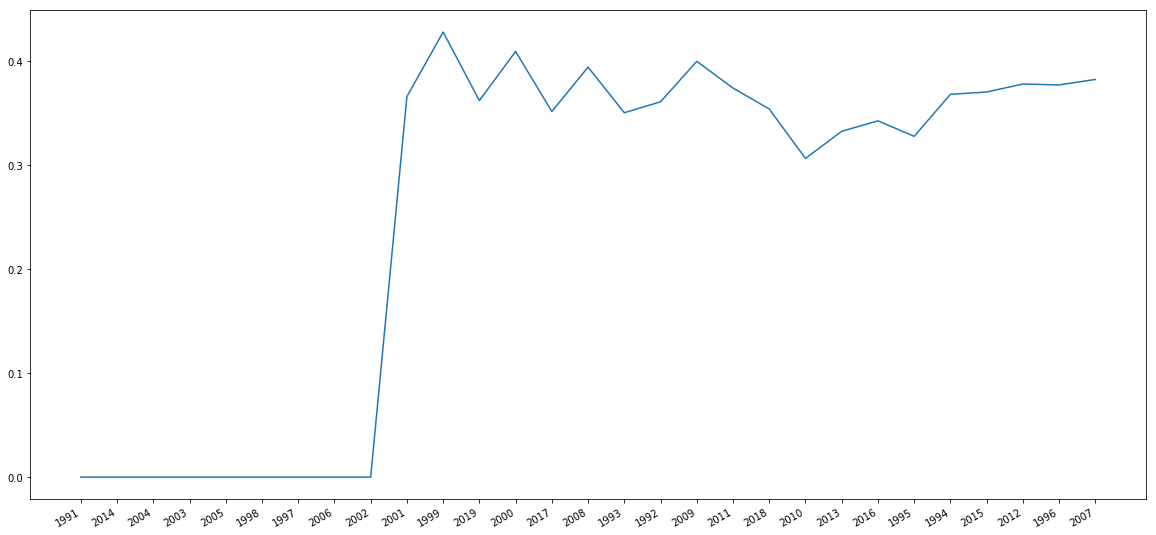

3 2
J. Hydrometeorol. Hydrol. Sci. J.-J. Sci. Hydrol.


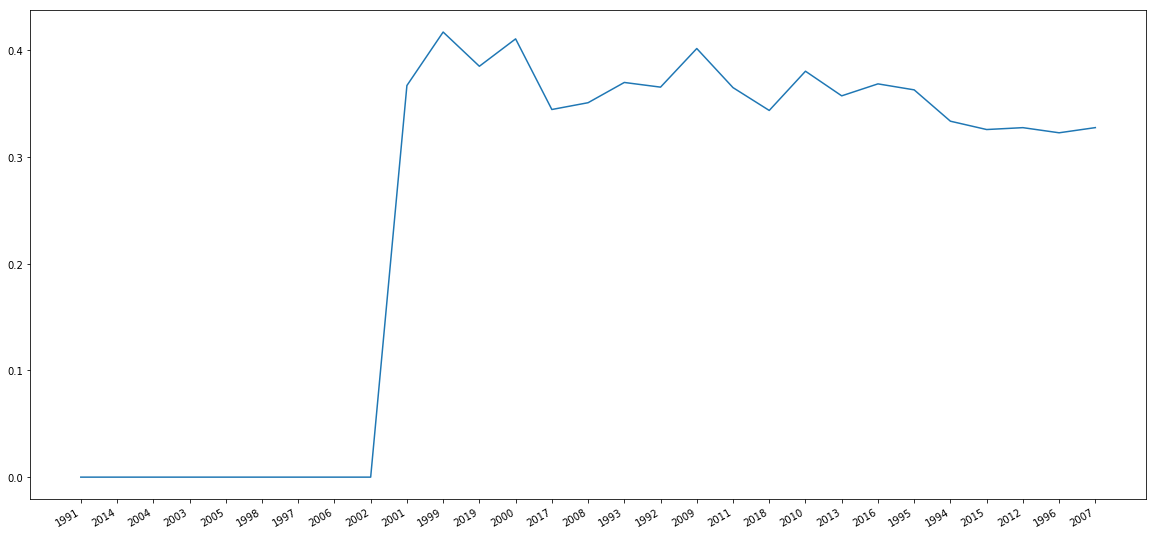

3 3
J. Hydrometeorol. J. Hydrometeorol.


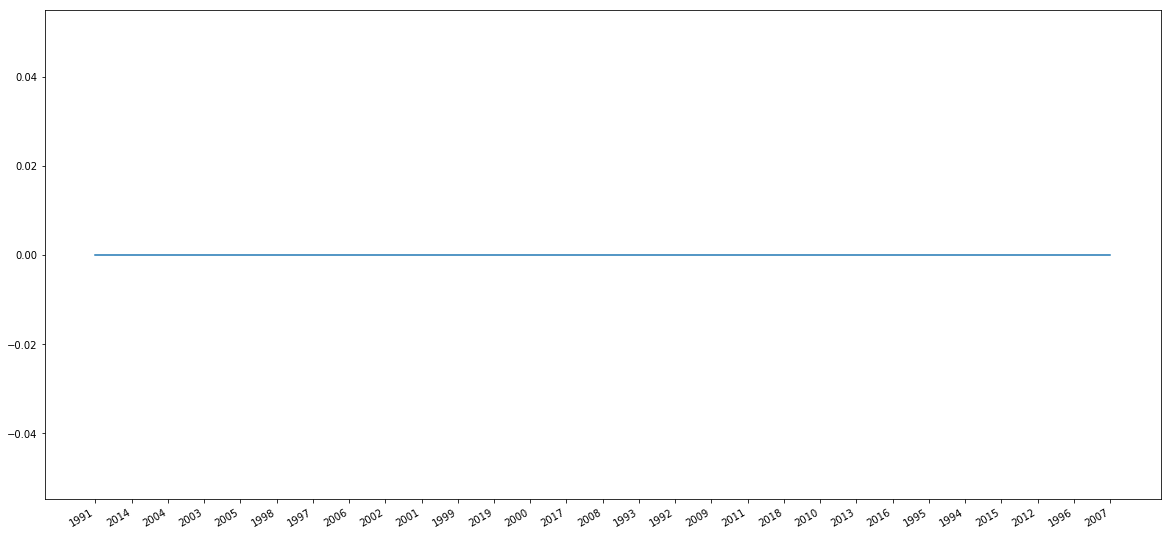

3 4
J. Hydrometeorol. J. Hydrol.


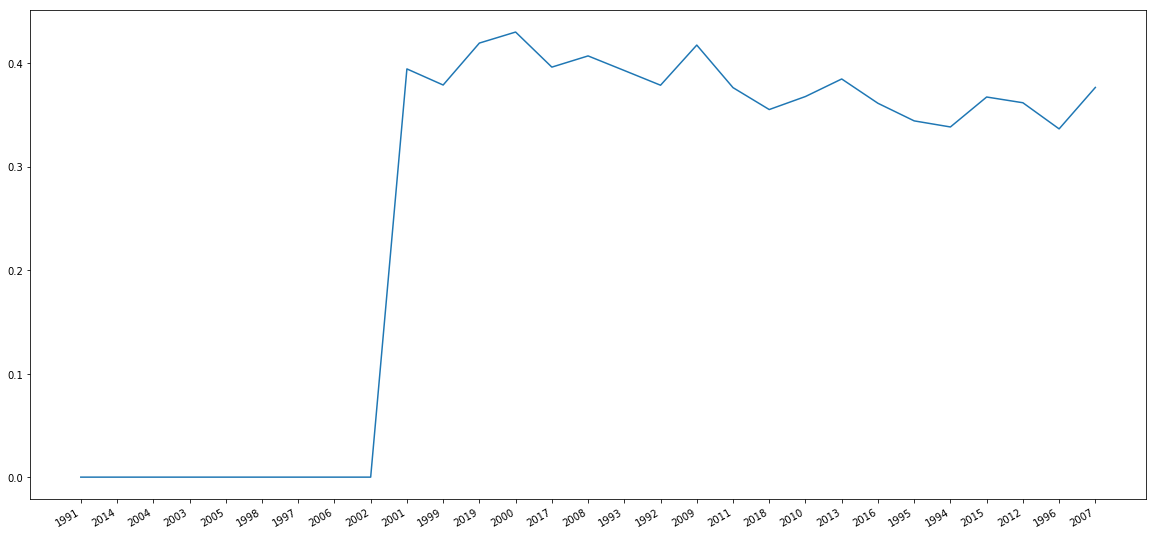

3 5
J. Hydrometeorol. Adv. Water Resour.


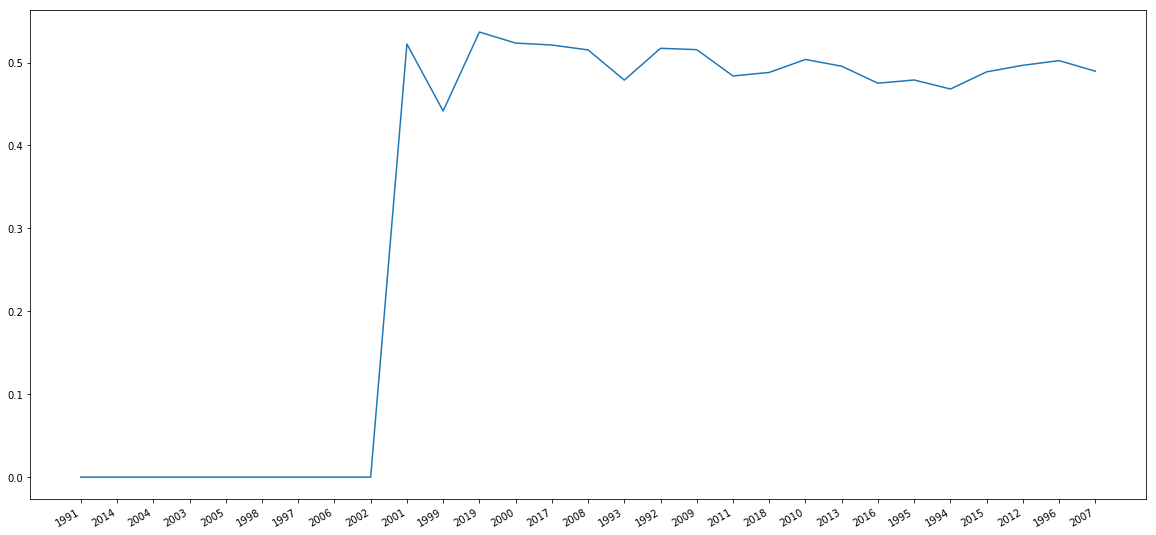

3 6
J. Hydrometeorol. Hydrol. Earth Syst. Sci.


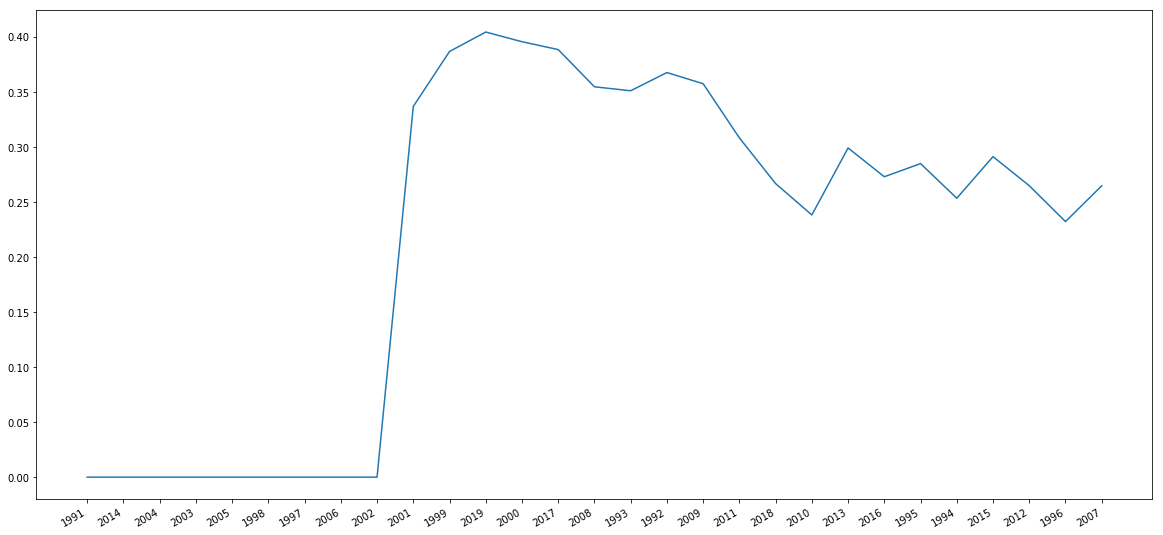

4 0
J. Hydrol. Water Resour. Res.


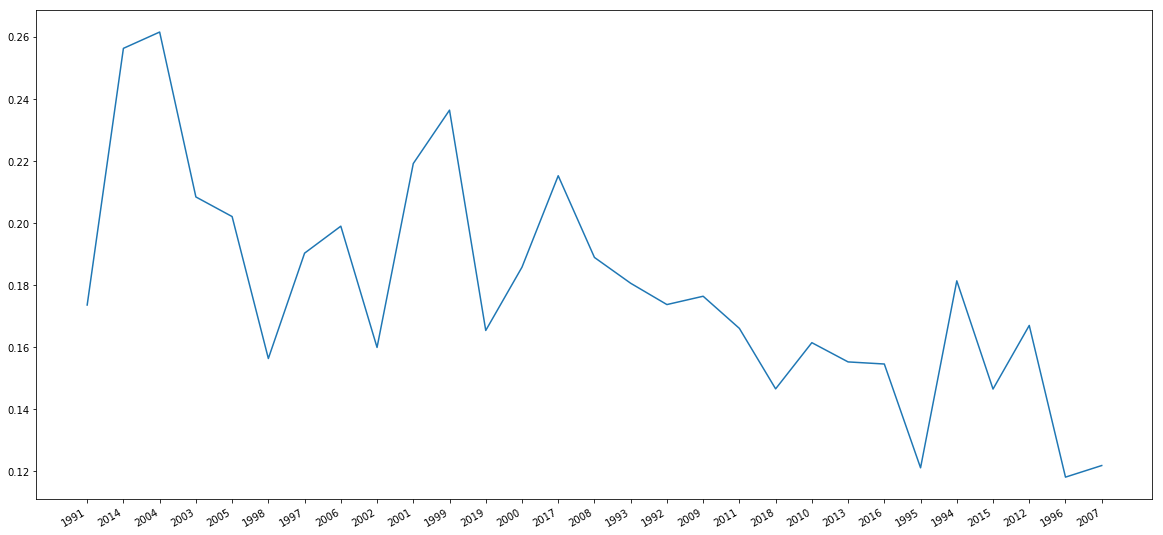

4 1
J. Hydrol. Hydrol. Process.


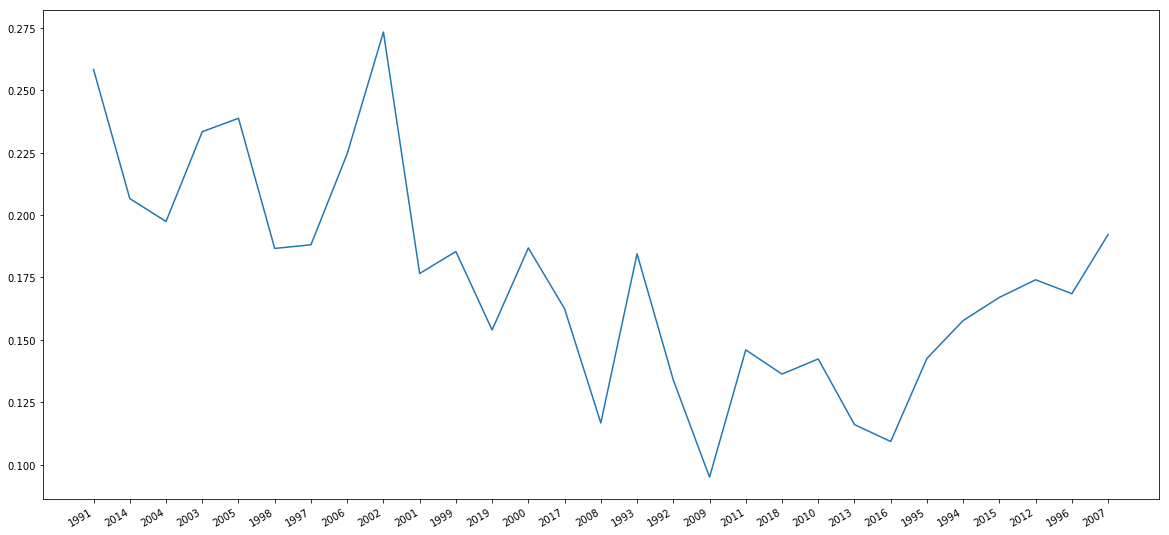

4 2
J. Hydrol. Hydrol. Sci. J.-J. Sci. Hydrol.


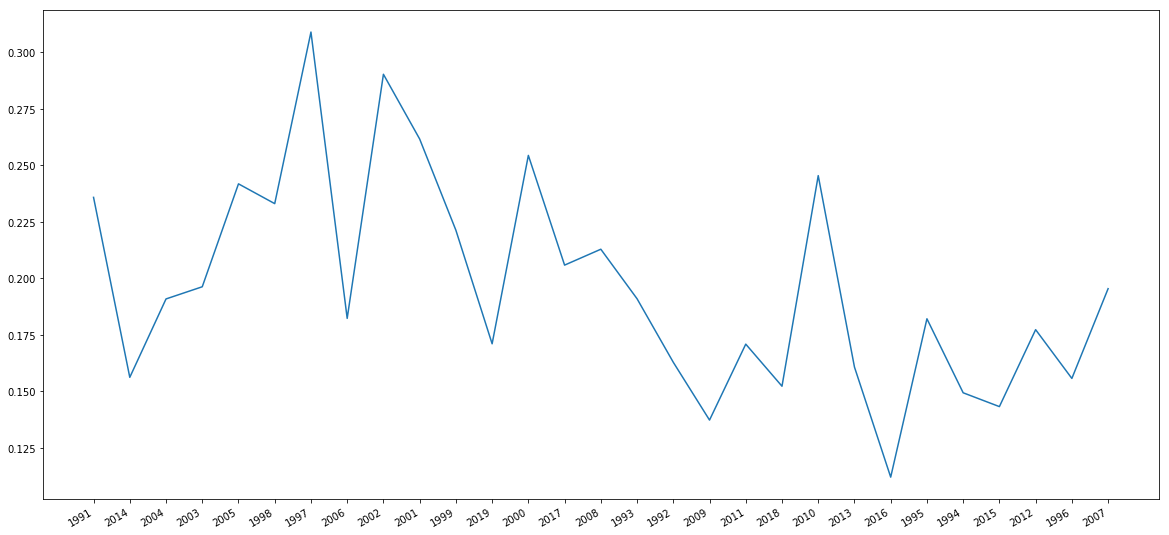

4 3
J. Hydrol. J. Hydrometeorol.


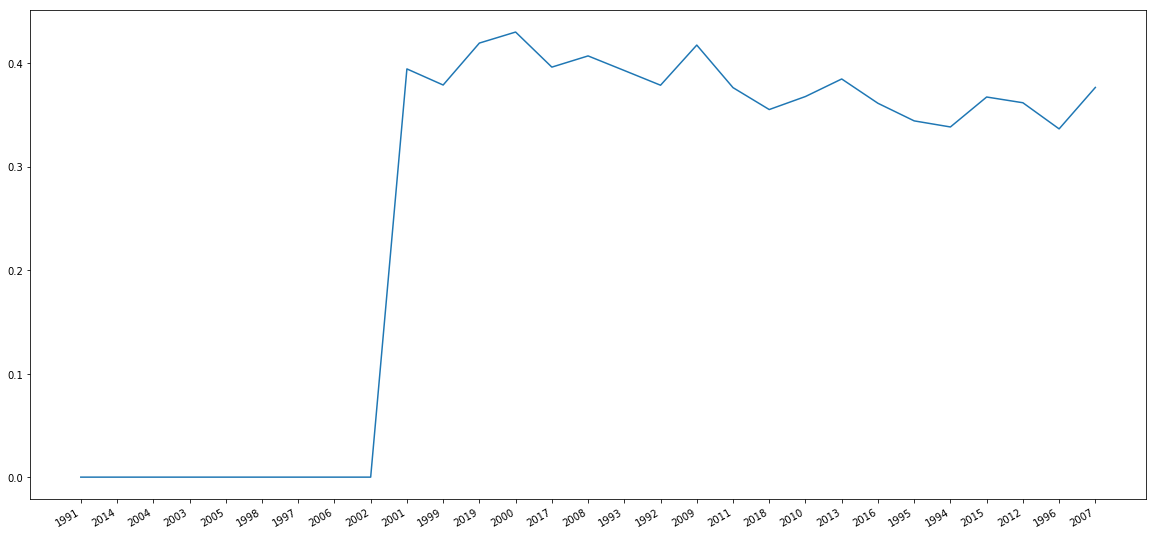

4 4
J. Hydrol. J. Hydrol.


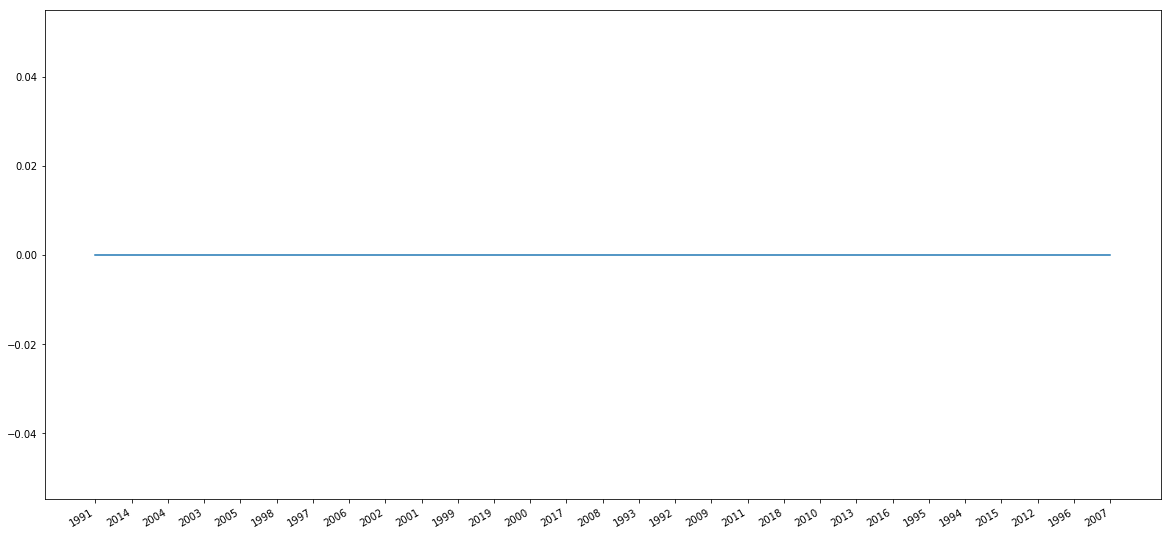

4 5
J. Hydrol. Adv. Water Resour.


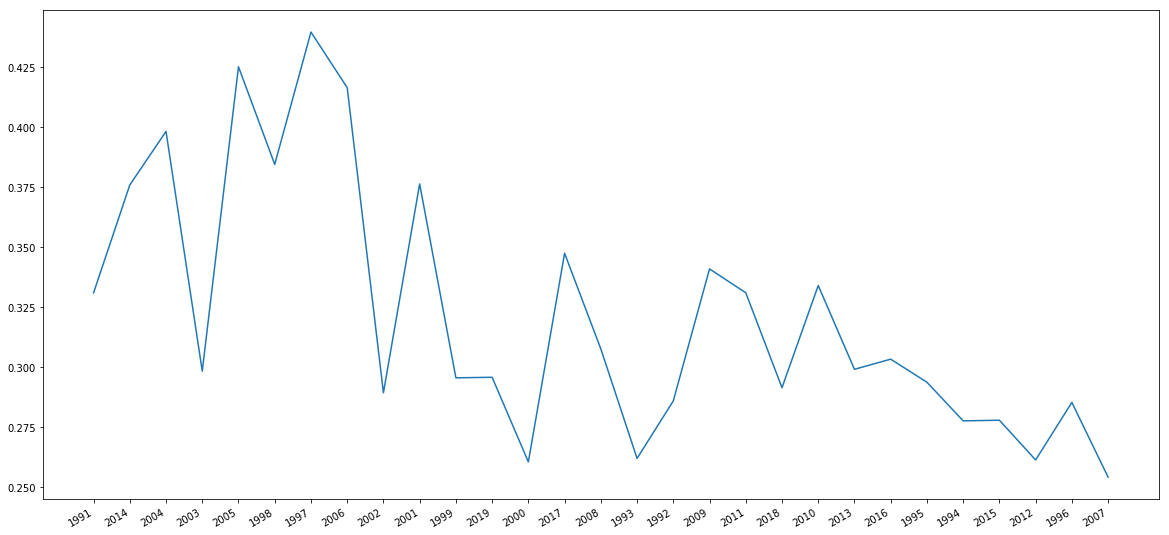

4 6
J. Hydrol. Hydrol. Earth Syst. Sci.


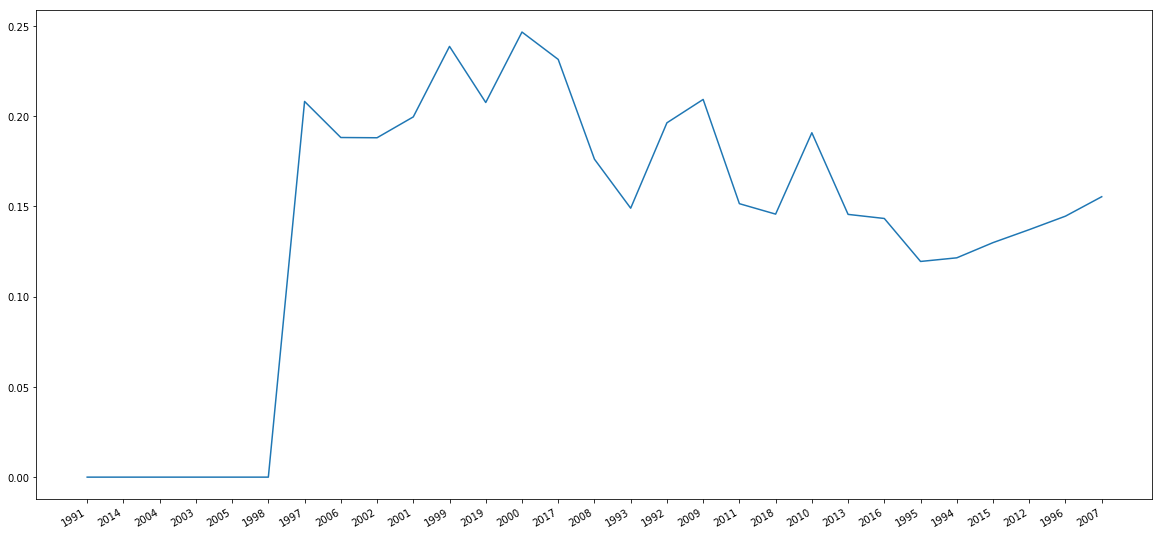

5 0
Adv. Water Resour. Water Resour. Res.


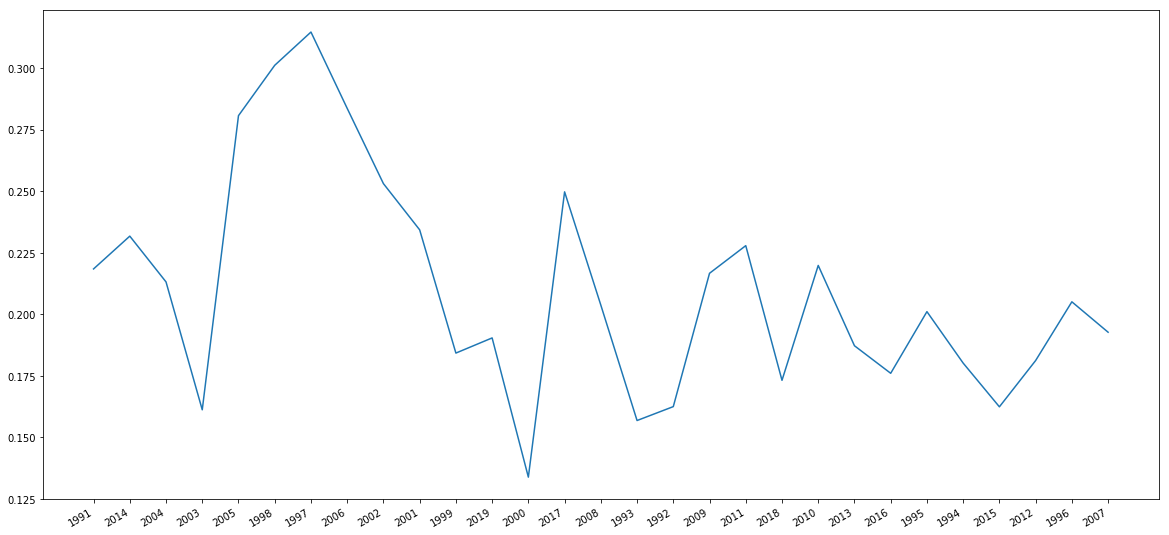

5 1
Adv. Water Resour. Hydrol. Process.


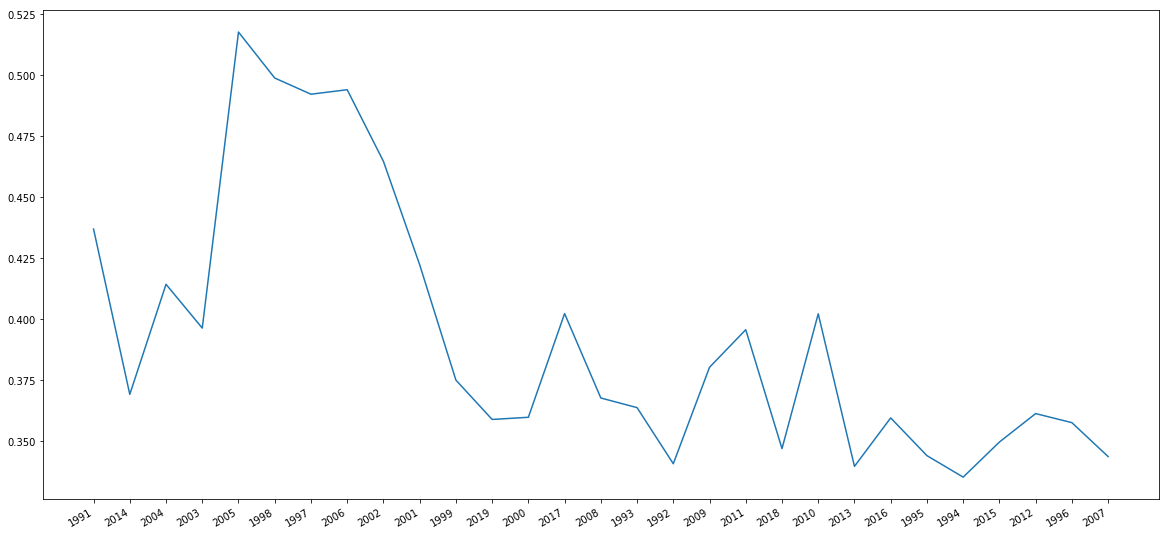

5 2
Adv. Water Resour. Hydrol. Sci. J.-J. Sci. Hydrol.


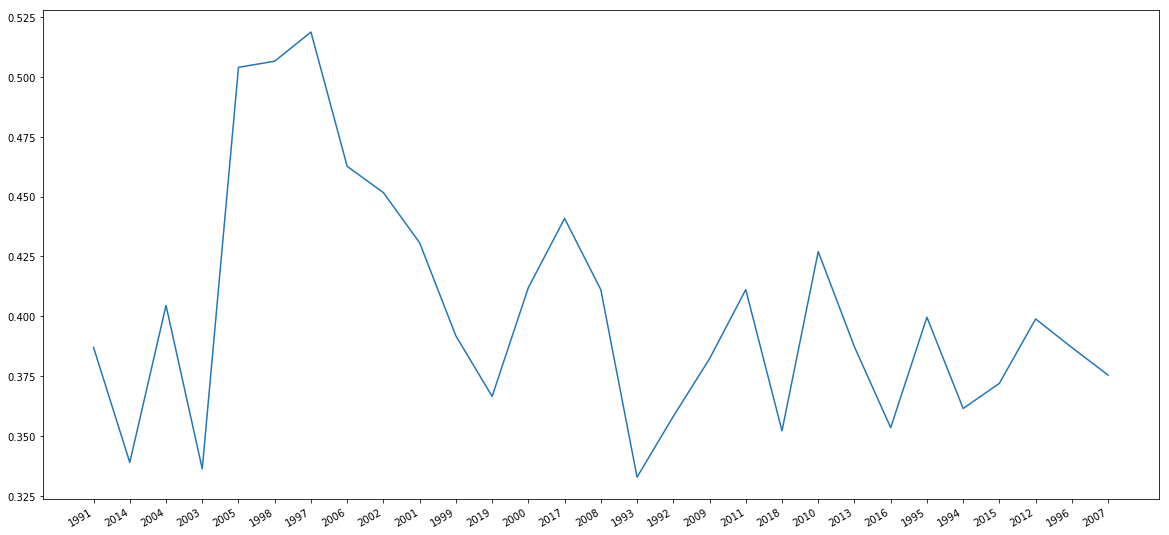

5 3
Adv. Water Resour. J. Hydrometeorol.


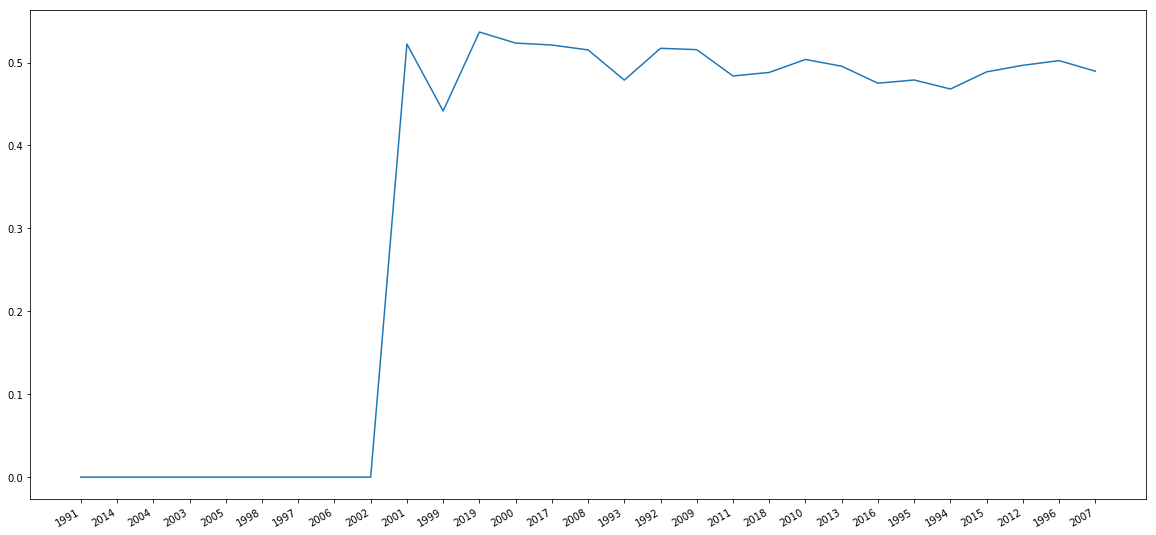

5 4
Adv. Water Resour. J. Hydrol.


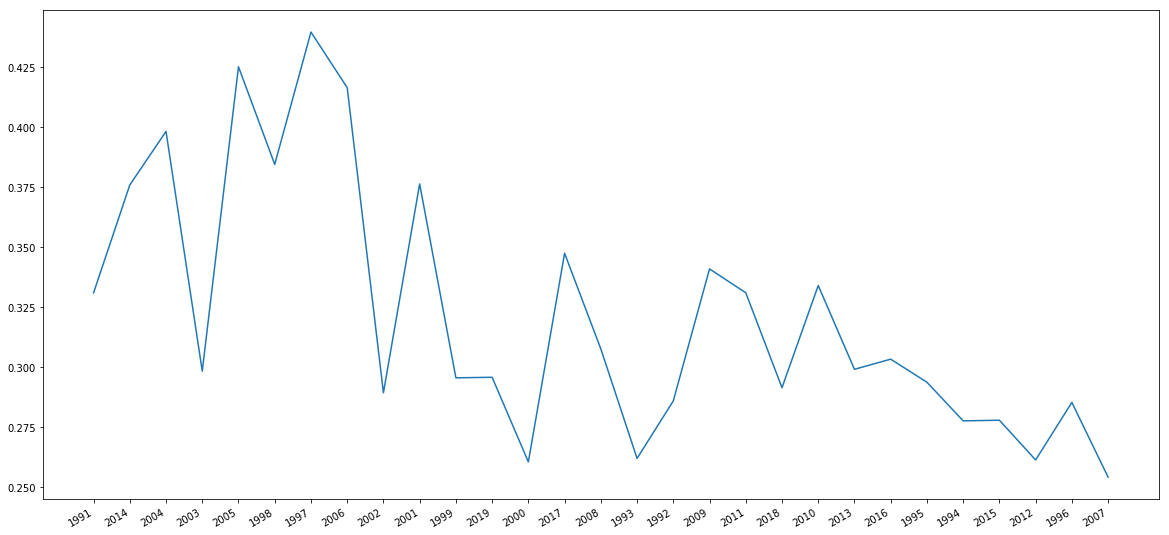

5 5
Adv. Water Resour. Adv. Water Resour.


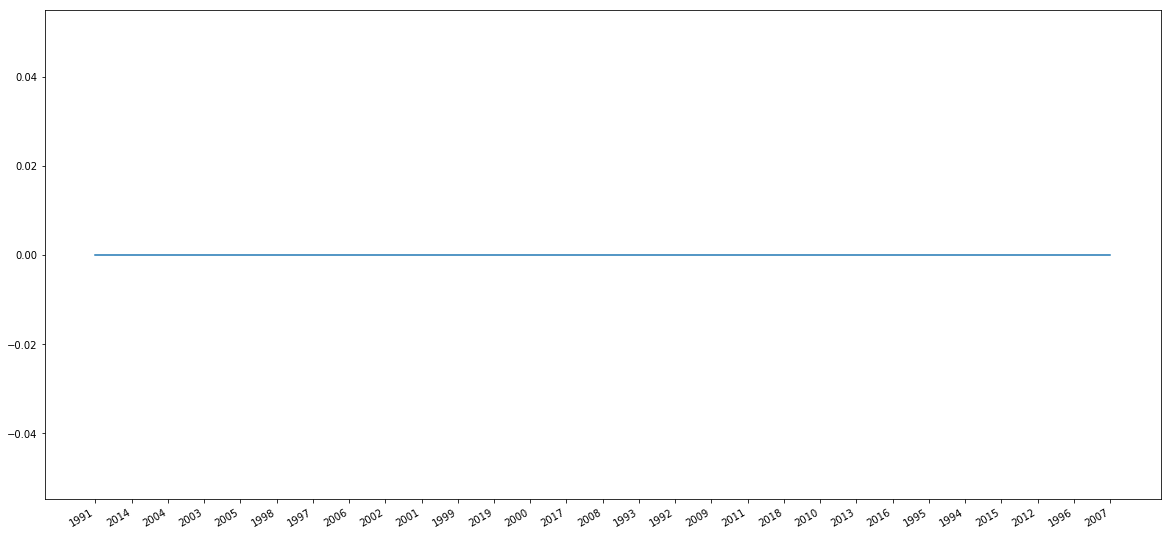

5 6
Adv. Water Resour. Hydrol. Earth Syst. Sci.


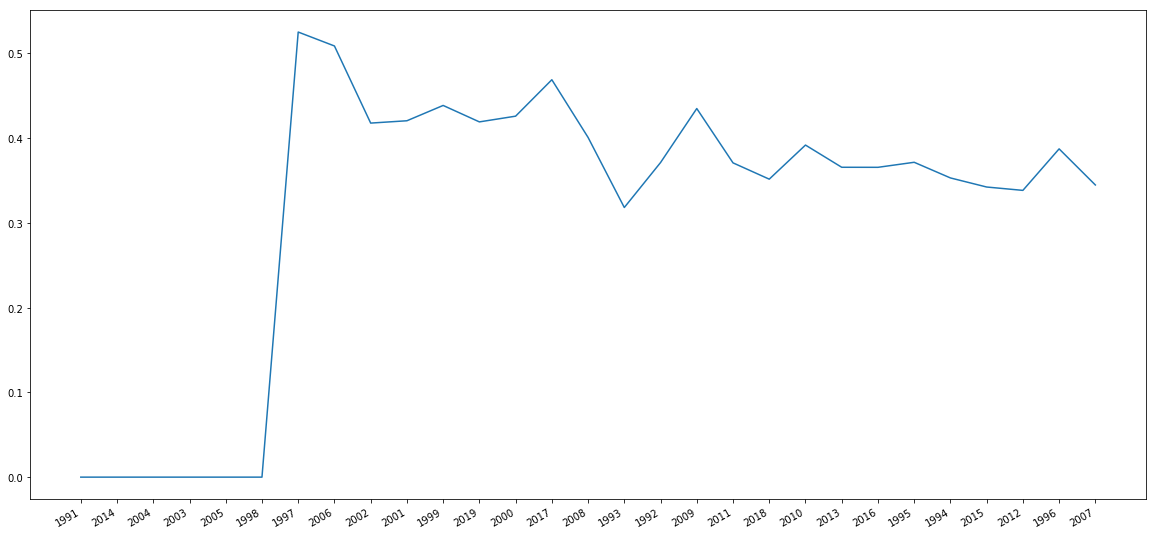

6 0
Hydrol. Earth Syst. Sci. Water Resour. Res.


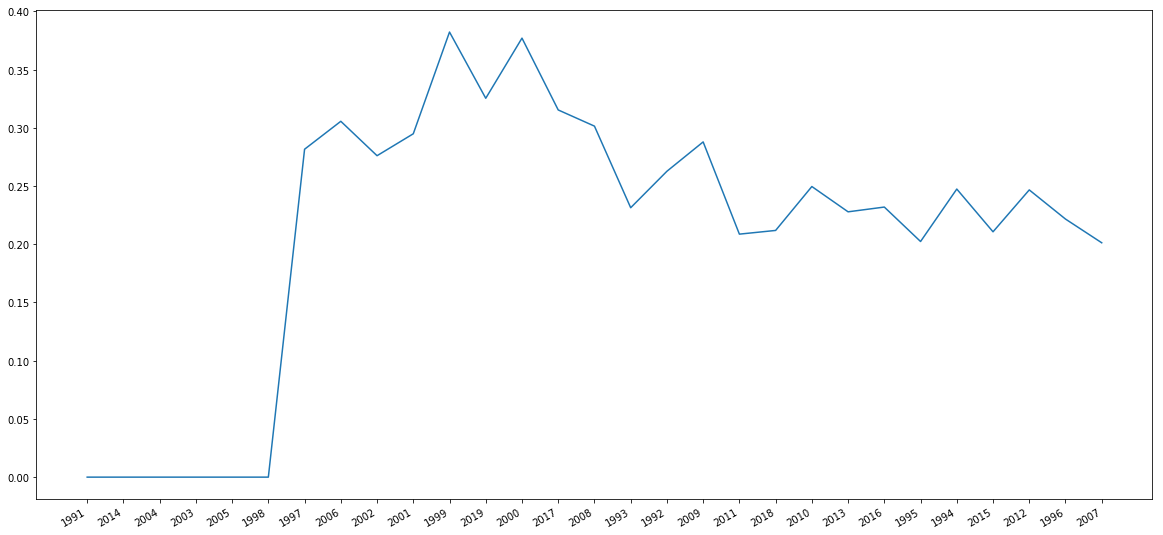

6 1
Hydrol. Earth Syst. Sci. Hydrol. Process.


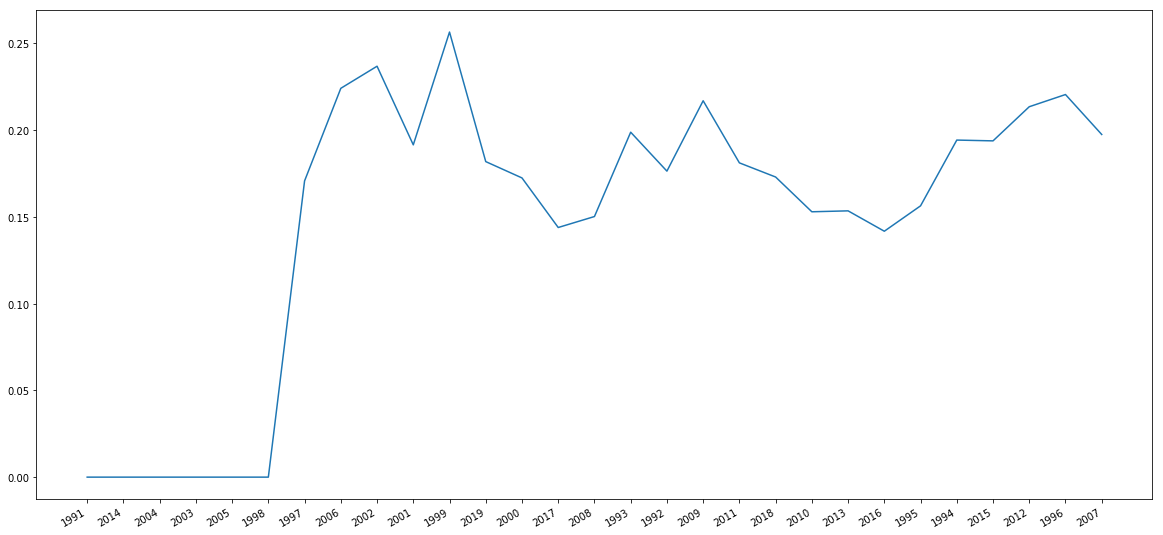

6 2
Hydrol. Earth Syst. Sci. Hydrol. Sci. J.-J. Sci. Hydrol.


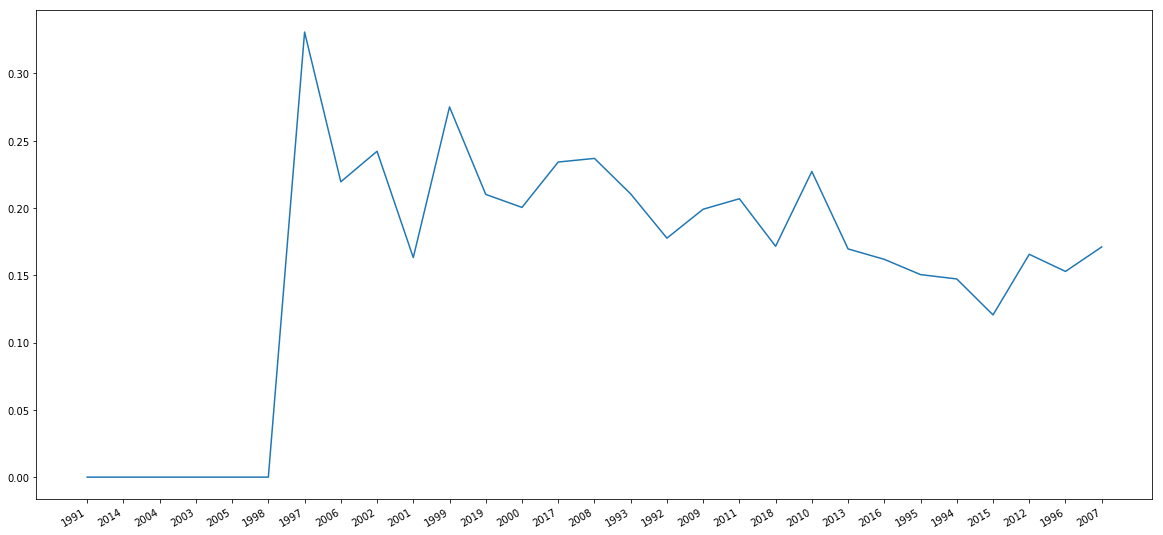

6 3
Hydrol. Earth Syst. Sci. J. Hydrometeorol.


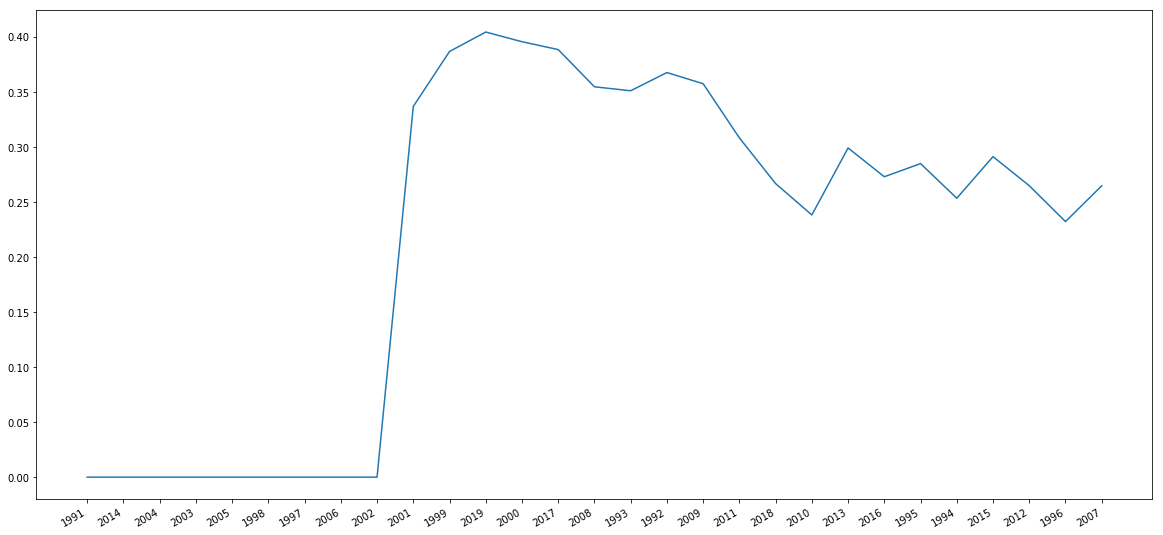

6 4
Hydrol. Earth Syst. Sci. J. Hydrol.


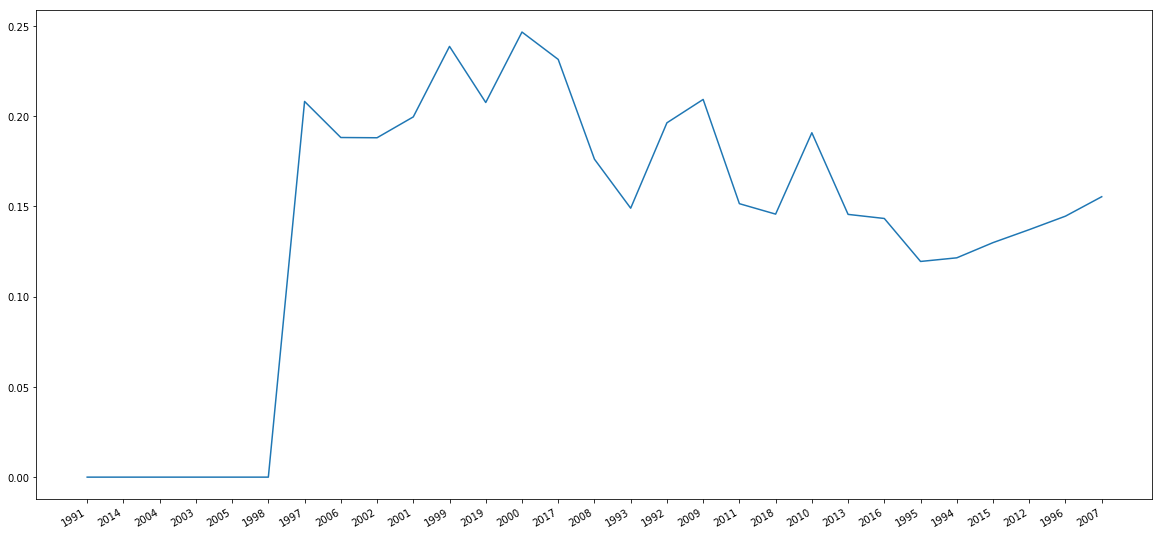

6 5
Hydrol. Earth Syst. Sci. Adv. Water Resour.


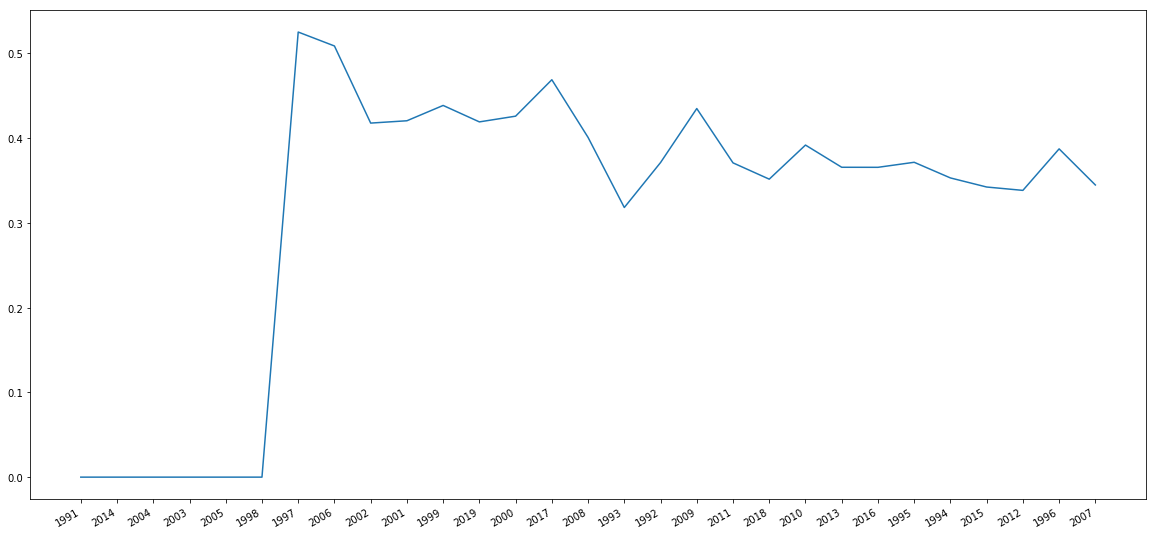

6 6
Hydrol. Earth Syst. Sci. Hydrol. Earth Syst. Sci.


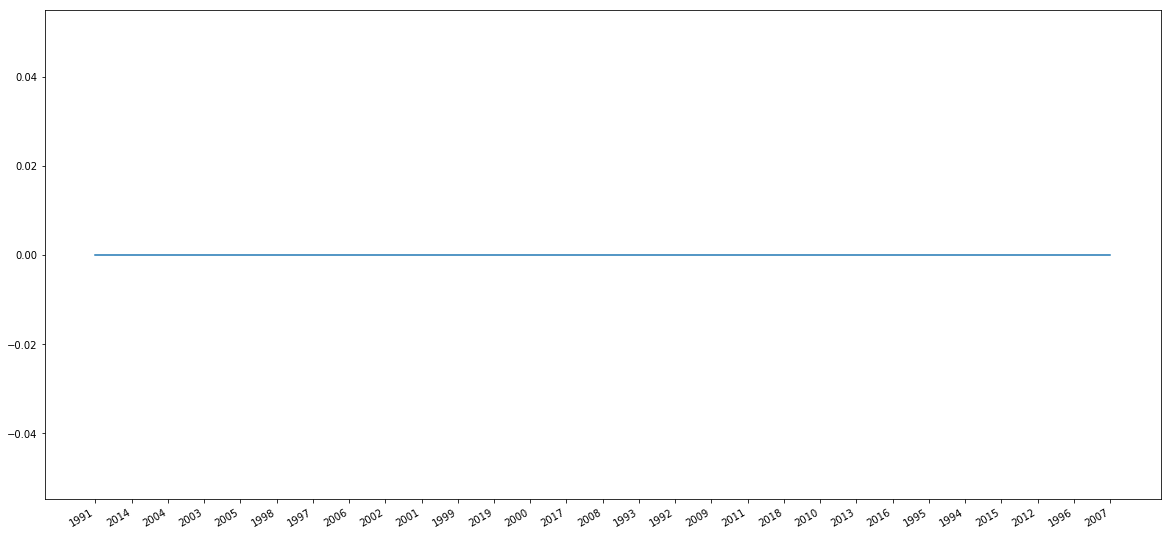

In [85]:
for j1, journal1 in enumerate(journals):
    for j2, journal2 in enumerate(journals):
        print(j1,j2)
        print(journal1, journal2)
        fig, ax = plt.subplots(figsize=(20,10))
        ax.plot(years, JSD_across_journals[j1,j2,:].transpose())
        fig.autofmt_xdate()
        plt.show()

In [83]:
JSD_across_journals.shape

(7, 7, 29)

In [86]:
njournals

7

1991


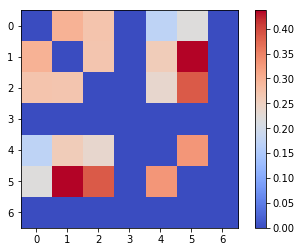

2014


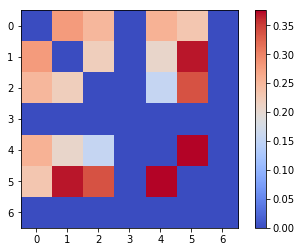

2004


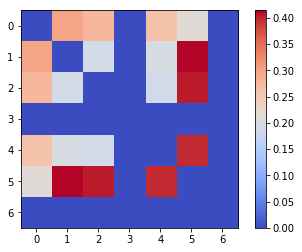

2003


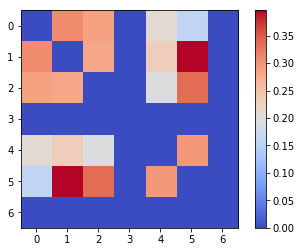

2005


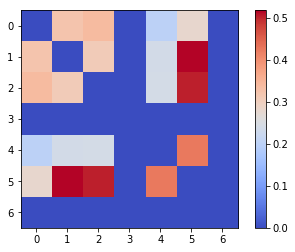

1998


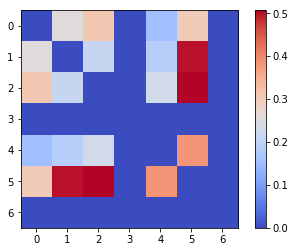

1997


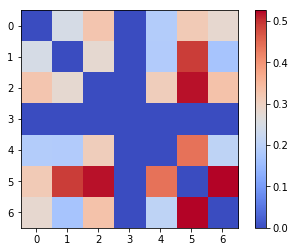

2006


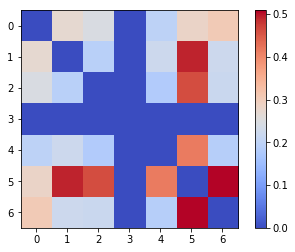

2002


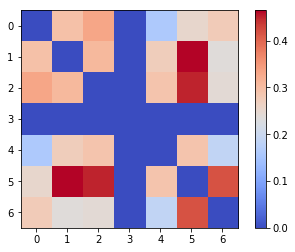

2001


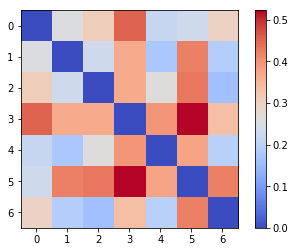

1999


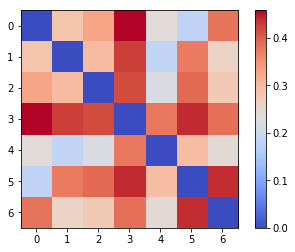

2019


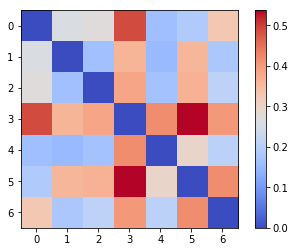

2000


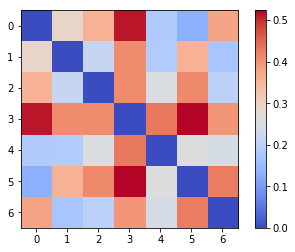

2017


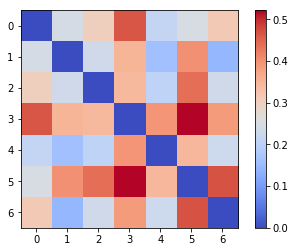

2008


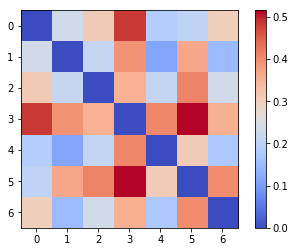

1993


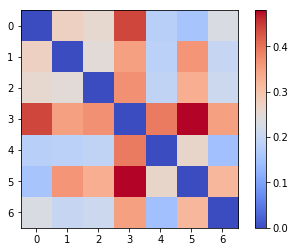

1992


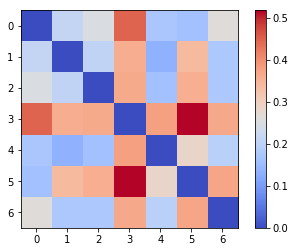

2009


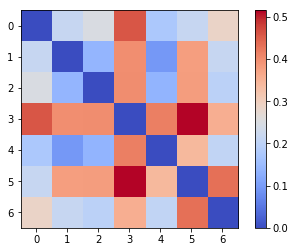

2011


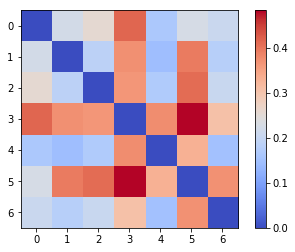

2018


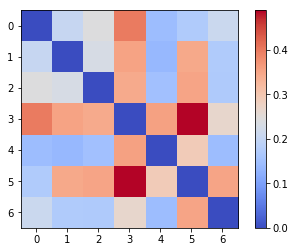

2010


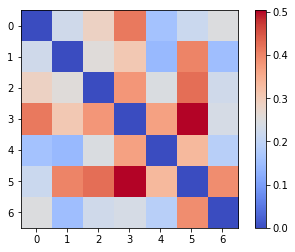

2013


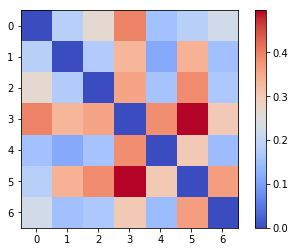

2016


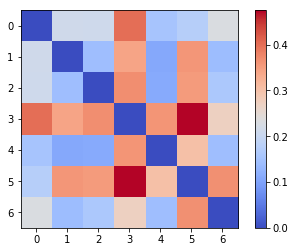

1995


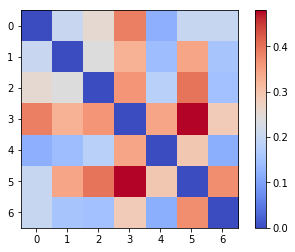

1994


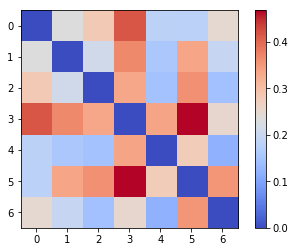

2015


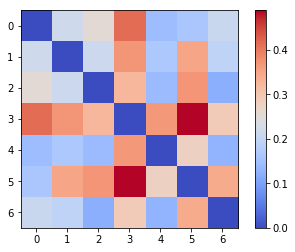

2012


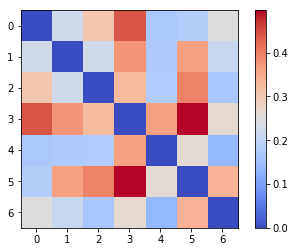

1996


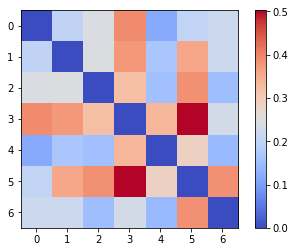

2007


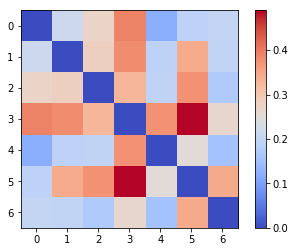

In [92]:
#plot confusion matrices for JSD over all years
for y, year in enumerate(years):
    print(year)
    conf_arr = np.array(JSD_across_journals[:,:,y])
    fig = plt.figure()
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    res = ax.imshow(np.array(conf_arr), cmap="coolwarm", 
                interpolation='nearest')

    width = njournals
    height = njournals

    # for x in range(width):
    #     for y in range(height):
    #         ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
    #                     horizontalalignment='center',
    #                     verticalalignment='center')

    cb = fig.colorbar(res)
    # alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    plt.xticks(range(width))#, alphabet[:width]
    plt.yticks(range(height))#, alphabet[:height])
    # plt.savefig('confusion_matrix.png', format='png')
    plt.show()
    plt.close()

In [27]:
#Spatial Distribution of Topica

#papers in countries
countries = corpus_df.Affiliation.unique()
countries

array(['CANADA', 'ITALY', 'NETHERLANDS', 'USA', 'SWEDEN', 'AUSTRALIA',
       'AUSTRIA', 'GERMANY', nan, 'GREECE', 'NY', 'DENMARK', 'NORWAY',
       'ZEALAND', 'CZECHOSLOVAKIA', 'ISRAEL', 'REPUBLIC', 'FRANCE',
       'CHINA', 'JAPAN', 'INDIA', 'IRELAND', 'VENEZUELA', 'AFRICA',
       'ENGLAND', 'MEXICO', 'THAILAND', 'TAIWAN', 'BANGLADESH', 'BRAZIL',
       'USSR', 'ARABIA', 'IRAN', 'Germany', 'Norway', 'Canada',
       'Australia', 'China', 'Denmark', 'Israel', 'Spain', 'Netherlands',
       'Iran', 'England', 'Italy', 'Japan', 'Colombia', 'Switzerland',
       'Finland', 'Zealand', 'France', 'Turkey', 'Sweden', 'Belgium',
       'Scotland', 'Morocco', 'Emirates', 'India', 'Bangladesh', 'Lanka',
       'Africa', 'Benin', 'Uzbekistan', 'Mauritius', 'Taiwan', 'Greece',
       'Singapore', 'Russia', 'Korea', 'Republic', 'Portugal', 'Lebanon',
       'Austria', 'Brazil', 'Oman', 'Pakistan', 'Chile', 'Ireland',
       'Arabia', 'CONGO', 'Mexico', 'Wales', 'Egypt', 'Argentina',
       'Thail

In [70]:
# countries
countries = np.unique(corpus_df['Affiliation'])
    
#init storage 
popularity_all_countries = {}
popularity_by_countries = np.zeros([len(corpus_df.Affiliation.uniqe()), len(years), lda_model.num_topics])


# loop through years
for y, year in enumerate(years):
    
    # extract all papers in this year
    topic_distributions_year = topic_distributions[corpus_df['Year'] == year,:]

    # calculate topic popularity for this year
    popularity_all_journals[year] = np.sum(topic_distributions_year, axis=0) / np.sum(topic_distributions_year)
    
    # topic popularity by country
    for c, countries in enumerate(corpus_df.Affiliation.unique()):
        cyidx = np.where(np.logical_and((corpus_df.Affiliation == country), (corpus_df.Year == year)))[0]
        popularity_by_countries[c,y,:] = np.sum(topic_distributions[cyidx,:], axis=0) / np.sum(topic_distributions[cyidx,:])

TypeError: '<' not supported between instances of 'float' and 'str'